# Objective

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 


The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


# Goals


1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Target Variable : Converted

### Steps Followed

- Reading Data
- Inspecting Data
- Cleaning Data
- EDA
- Creating Dummy
- Splitting data into train and test set
- Building Model
- Model Evaluation (Train set)
    - Making Predictions 
    - ROC Curve
    - Precision- Recall
- Predictions on test set
- Lead Score
- Conclusions, Summary 

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Importing miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

# 1. Reading Data 

In [2]:
# Importing dataset
leads_df = pd.read_csv("Leads.csv")
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [3]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
# standardise the column names by replacing ' ' with '_'

leads_df.columns = ['_'.join(name.split()) for name in leads_df.columns]
leads_df.head()

Prospect_ID  Lead_Number              Lead_Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead_Source Do_Not_Email Do_Not_Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit            Last_Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How_did_you_hear_about_X_Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What_is_your_current_occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What_matters_most_to_you_in_choosing_a_course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper_Article X_Education_Forums Newspaper Digital_Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through_Recommendations Receive_More_Updates_About_Our_Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead_Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update_me_on_Supply_Chain_Content Get_updates_on_DM_Content    Lead_Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

# 2. Inspecting Data

In [5]:
# Let's check the dimensions of the dataframe
leads_df.shape

(9240, 37)

Total rows/records -> 9240


Total Columns -> 37

In [6]:
# let's look at the statistical aspects of the dataframe
leads_df.describe()

Lead_Number    Converted  TotalVisits  Total_Time_Spent_on_Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page_Views_Per_Visit  Asymmetrique_Activity_Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique_Profile_Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Let's see the type of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    9240 non-null   object 
 1   Lead_Number                                    9240 non-null   int64  
 2   Lead_Origin                                    9240 non-null   object 
 3   Lead_Source                                    9204 non-null   object 
 4   Do_Not_Email                                   9240 non-null   object 
 5   Do_Not_Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total_Time_Spent_on_Website                    9240 non-null   int64  
 9   Page_Views_Per_Visit                           9103 

In [8]:
#  Checking for any duplicated data

leads_df[leads_df.duplicated()]

Empty DataFrame
Columns: [Prospect_ID, Lead_Number, Lead_Origin, Lead_Source, Do_Not_Email, Do_Not_Call, Converted, TotalVisits, Total_Time_Spent_on_Website, Page_Views_Per_Visit, Last_Activity, Country, Specialization, How_did_you_hear_about_X_Education, What_is_your_current_occupation, What_matters_most_to_you_in_choosing_a_course, Search, Magazine, Newspaper_Article, X_Education_Forums, Newspaper, Digital_Advertisement, Through_Recommendations, Receive_More_Updates_About_Our_Courses, Tags, Lead_Quality, Update_me_on_Supply_Chain_Content, Get_updates_on_DM_Content, Lead_Profile, City, Asymmetrique_Activity_Index, Asymmetrique_Profile_Index, Asymmetrique_Activity_Score, Asymmetrique_Profile_Score, I_agree_to_pay_the_amount_through_cheque, A_free_copy_of_Mastering_The_Interview, Last_Notable_Activity]
Index: []

#### We observe that: 
1. there exists null or missing values in both categorical and continuous data.
2. few categorical columns for which dummy variables needs to be created.
3. There aint any duplicate values.

# 3. Cleaning Data 

In [9]:
# backup 

leads_df1 = leads_df.copy()

In [10]:
# Converting all the values to lower case

leads_df = leads_df.applymap(lambda x:x.lower() if type(x) == str else x)

In [11]:
# We observe that in columns like 'Specialisation', 'Lead_Profile' , 'City' etc, "Select" value exists.
# Replacing 'Select' with NaN (Since it means no option is selected)

leads_df = leads_df.replace('select',np.nan)

### 3.1 Drop unique values columns

In [12]:
# Check for the columns with unique values

leads_df.nunique()

Prospect_ID                                      9240
Lead_Number                                      9240
Lead_Origin                                         5
Lead_Source                                        20
Do_Not_Email                                        2
Do_Not_Call                                         2
Converted                                           2
TotalVisits                                        41
Total_Time_Spent_on_Website                      1731
Page_Views_Per_Visit                              114
Last_Activity                                      17
Country                                            38
Specialization                                     18
How_did_you_hear_about_X_Education                  9
What_is_your_current_occupation                     6
What_matters_most_to_you_in_choosing_a_course       3
Search                                              2
Magazine                                            1
Newspaper_Article           

#### We observe that, 
1. columns with unique values = 1 have value as "NO". The single value columns do not help in further analysis, hence dropping them.
2. Also, ***prospect_id and lead_number*** have all distinct values. The distinct values are generally used for identification of individual records but does not help in analysis. Hence dropping these two as well.

In [13]:
# dropping the columns with unique values = 1

cols = leads_df.columns

for i in cols:
    if(leads_df[i].nunique() == 1):
        leads_df.drop(i, axis = 1, inplace = True)

In [14]:
leads_df.drop(['Prospect_ID', 'Lead_Number'], axis = 1, inplace = True)

In [15]:
leads_df.shape

(9240, 30)

### 3.2 Missing/Null Values

In [16]:
# Check the number of missing values in each column

leads_df.isnull().sum()

Lead_Origin                                         0
Lead_Source                                        36
Do_Not_Email                                        0
Do_Not_Call                                         0
Converted                                           0
TotalVisits                                       137
Total_Time_Spent_on_Website                         0
Page_Views_Per_Visit                              137
Last_Activity                                     103
Country                                          2461
Specialization                                   3380
How_did_you_hear_about_X_Education               7250
What_is_your_current_occupation                  2690
What_matters_most_to_you_in_choosing_a_course    2709
Search                                              0
Newspaper_Article                                   0
X_Education_Forums                                  0
Newspaper                                           0
Digital_Advertisement       

In [17]:
# Checking the percentage of missing values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How_did_you_hear_about_X_Education               78.46
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Newspaper_Article                                 0.00
X_Education_Forums                                0.00
Newspaper                                         0.00
Digital_Ad

#### 3.2.a) Remove columns with null values >= 40%

In [18]:
cols = leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 40):
        leads_df.drop(i, axis = 1, inplace = True)

In [19]:
# Checking again % of the null values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Newspaper_Article                                 0.00
X_Education_Forums                                0.00
Newspaper                                         0.00
Digital_Advertisement                             0.00
Through_Re

There are still noticable missing values in columns:--

1. Country
2. Specialization
3. What_is_your_current_occupation
4. What_matters_most_to_you_in_choosing_a_course
5. Tags
6. City

- The above six columns are few of the most important details about a candidate.
- In case, ***these six values are NULL, then it is better to drop those records, rather than imputing or dropping the columns***.

#### 3.2.b) Dropping records where noticable columns have all null values across

In [20]:
# null values in all the six noticeable columns

leads_df[leads_df['What_matters_most_to_you_in_choosing_a_course'].isnull() &
         leads_df['Country'].isnull() &
         leads_df['What_is_your_current_occupation'].isnull() &
         leads_df['Tags'].isnull() & 
         leads_df['Specialization'].isnull() &
         leads_df['City'].isnull()]

Lead_Origin Lead_Source Do_Not_Email Do_Not_Call  Converted  TotalVisits  \
5            api  olark chat           no          no          0          0.0   
7            api  olark chat           no          no          0          0.0   
16           api  olark chat           no          no          0          0.0   
47           api  olark chat           no          no          0          0.0   
49           api  olark chat           no          no          0          0.0   
...          ...         ...          ...         ...        ...          ...   
9136         api  olark chat           no          no          0          0.0   
9137         api  olark chat           no          no          0          0.0   
9154         api  olark chat           no          no          0          1.0   
9165         api  olark chat           no          no          1          0.0   
9187         api  olark chat           no          no          1          0.0   

      Total_Time_Spent_on_Website  Page_Views_Per_Visit  \
5                               0                   0.0   
7                               0                   0.0   
16                              0                   0.0   
47                              0                   0.0   
49                              0                   0.0   
...                           ...                   ...   
9136                            0                   0.0   
9137                            0                   0.0   
9154                         1858                   1.0   
9165                            0                   0.0   
9187                            0                   0.0   

                Last_Activity Country Specialization  \
5     olark chat conversation     NaN            NaN   
7     olark chat conversation     NaN            NaN   
16    olark chat conversation     NaN            NaN   
47    olark chat conversation     NaN            NaN   
49    olark chat conversation     NaN            NaN   
...                       ...     ...            ...   
9136                 sms sent     NaN            NaN   
9137  olark chat conversation     NaN            NaN   
9154                 sms sent     NaN            NaN   
9165                 sms sent     NaN            NaN   
9187                 sms sent     NaN            NaN   

     What_is_your_current_occupation  \
5                                NaN   
7                                NaN   
16                               NaN   
47                               NaN   
49                               NaN   
...                              ...   
9136                             NaN   
9137                             NaN   
9154                             NaN   
9165                             NaN   
9187                             NaN   

     What_matters_most_to_you_in_choosing_a_course Search Newspaper_Article  \
5                                              NaN     no                no   
7                                              NaN     no                no   
16                                             NaN     no                no   
47                                             NaN     no                no   
49                                             NaN     no                no   
...                                            ...    ...               ...   
9136                                           NaN     no                no   
9137                                           NaN     no                no   
9154                                           NaN     no                no   
9165                                           NaN     no                no   
9187                                           NaN     no                no   

     X_Education_Forums Newspaper Digital_Advertisement  \
5                    no        no                    no   
7                    no        no                    no   
16                   no        no          

In [21]:
#backup 
leads_df2 = leads_df.copy()

# drop the rows where all the six columns have null values

leads_df = leads_df[~(leads_df['Specialization'].isnull() &
        leads_df['What_matters_most_to_you_in_choosing_a_course'].isnull() &
         leads_df['Country'].isnull() &
         leads_df['What_is_your_current_occupation'].isnull() &
         leads_df['Tags'].isnull() &
         leads_df['City'].isnull())]

leads_df.shape

(8414, 23)

In [22]:
# checking again on null values %

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead_Origin                                       0.00
Lead_Source                                       0.43
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.62
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.62
Last_Activity                                     1.22
Country                                          19.43
Specialization                                   30.35
What_is_your_current_occupation                  22.15
What_matters_most_to_you_in_choosing_a_course    22.38
Search                                            0.00
Newspaper_Article                                 0.00
X_Education_Forums                                0.00
Newspaper                                         0.00
Digital_Advertisement                             0.00
Through_Re

#### 3.2.c) Initial Visualization

In [23]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

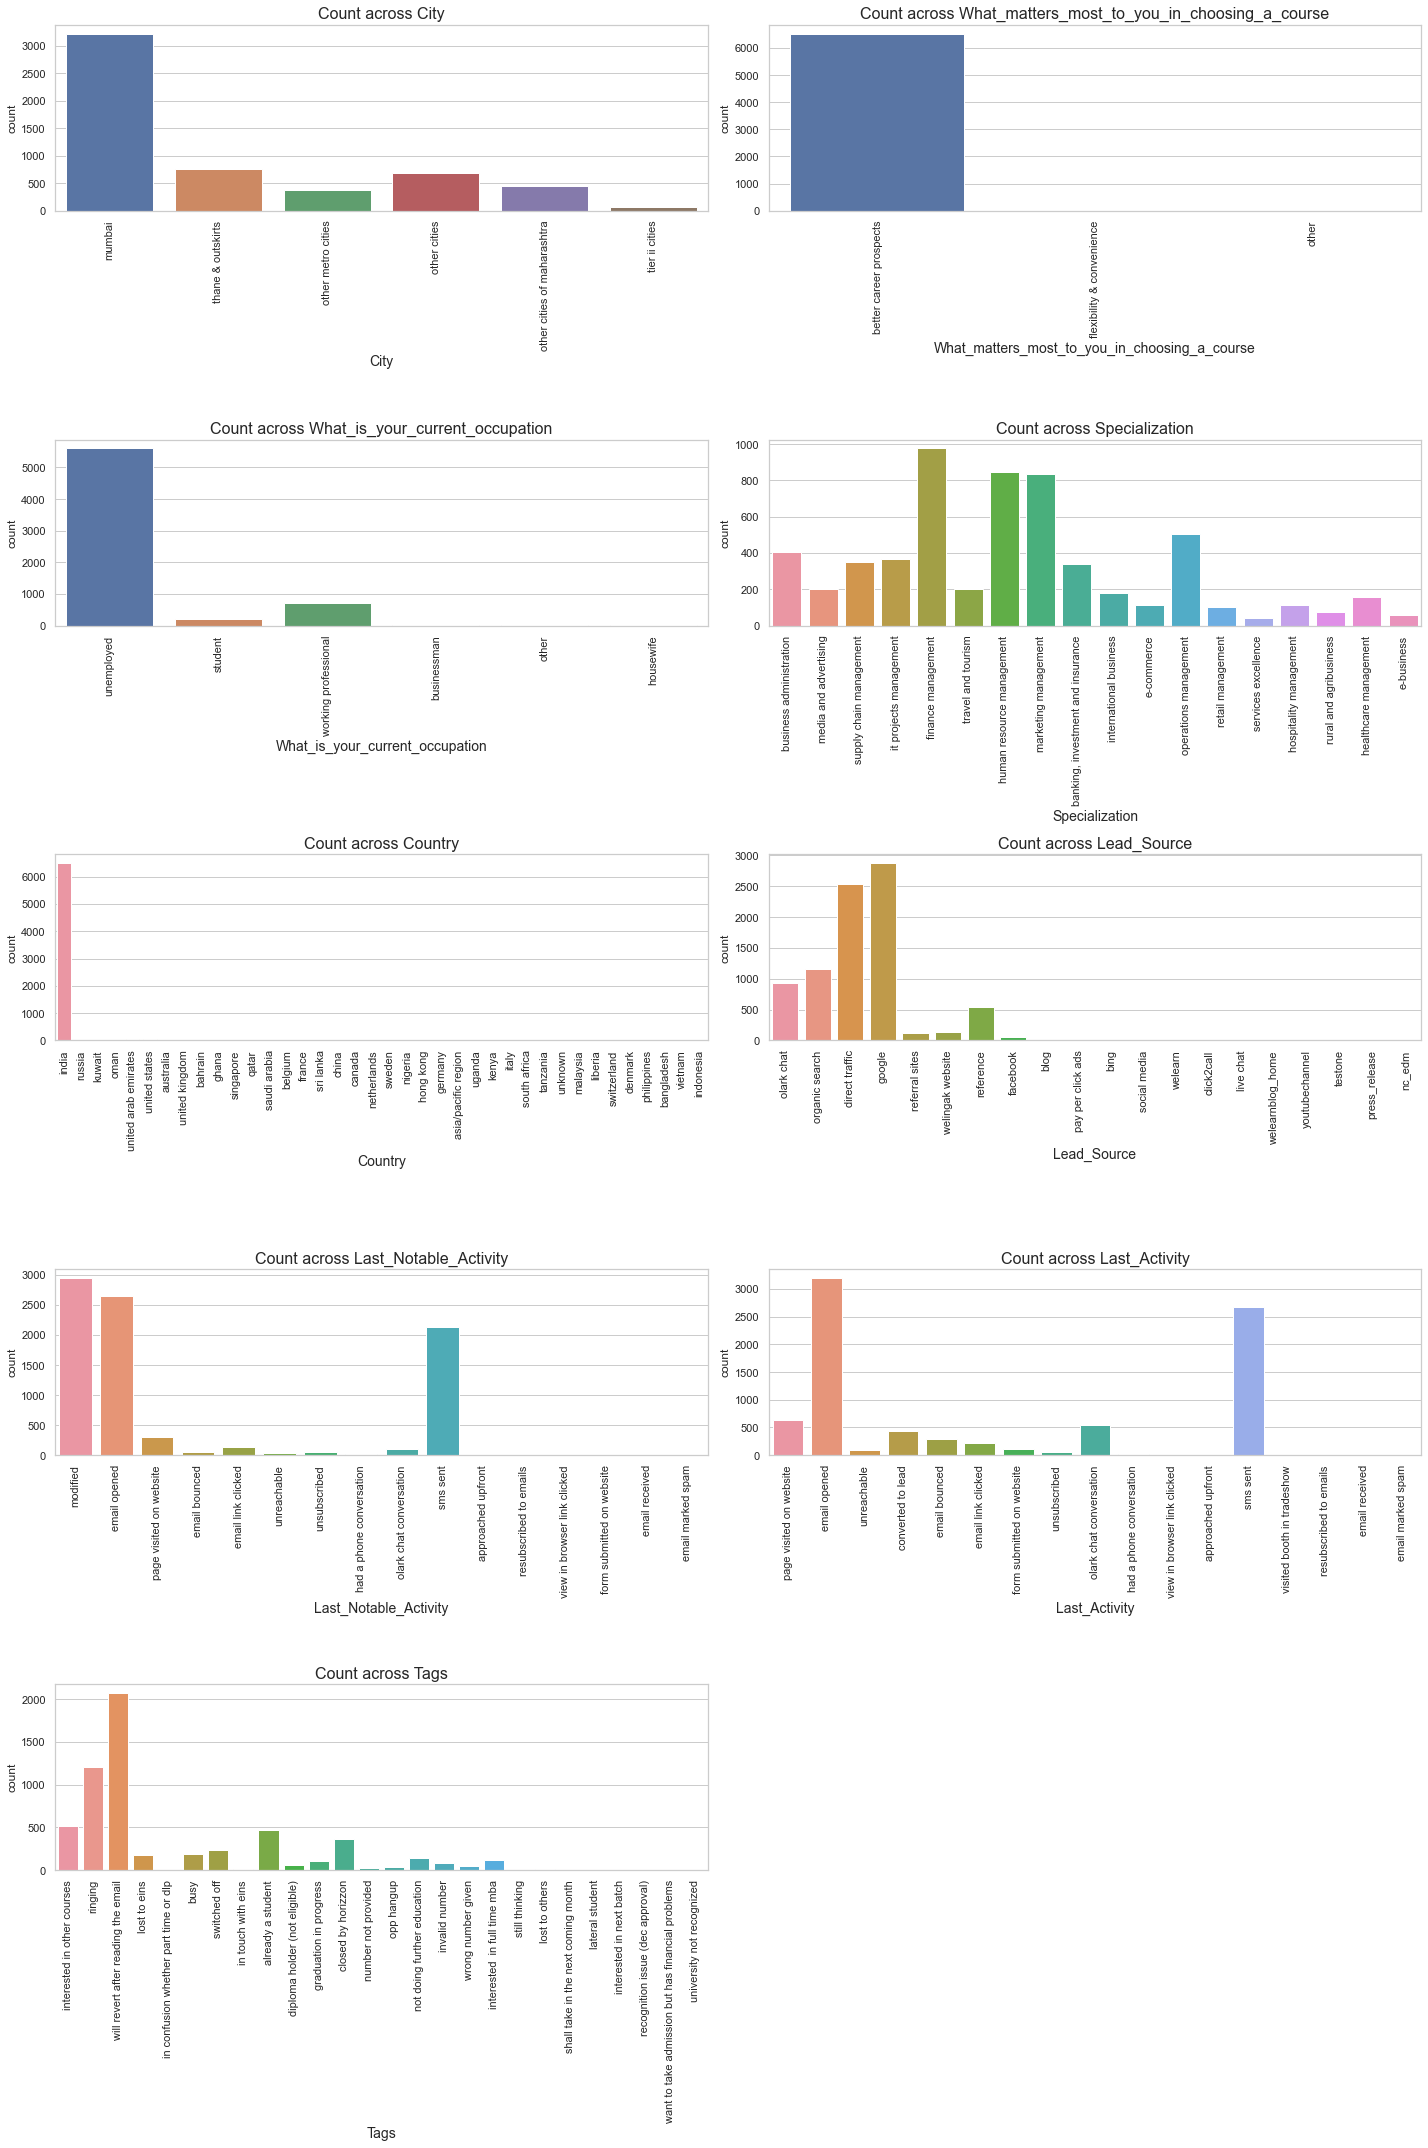

In [24]:
def countplot(x, fig):
    plt.subplot(5,2, fig)
    sns.countplot(leads_df[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(20,30))


countplot('City',1)
countplot('What_matters_most_to_you_in_choosing_a_course',2)
countplot('What_is_your_current_occupation',3)
countplot('Specialization',4)
countplot('Country',5)
countplot('Lead_Source',6)
countplot('Last_Notable_Activity',7)
countplot('Last_Activity',8)
countplot('Tags',9)

plt.tight_layout()

#### Inferences:

1. From the count plot of city, we can see that maximum records are from ***City -> Mumbai***.

2. ***Better career prospects***, matters the most while choosing a course.

3. The occupation of maximum number of records is ***Unemployed***.

4. Majority of the records are ***specialised in Finance Management, followed by Human Resource & Manufacturing Management***.

5. Majority of the records are from ***Country -> India***.

6. Majority of the records are having ***Tags -> "will revert after reading the email"***.

7. Majority of the records are from ***Lead_Source -> "Google, direct traffic, organic search".***

8. Majority of the records are from ***Last_Activity and Last_Notable_Activity -> "email opened and sms sent".***

### 3.3 Imputing and Replacing the missing values

#### Tags

In [25]:
leads_df['Tags'].value_counts(normalize = True, dropna = False)

NaN                                                  0.300333
will revert after reading the email                  0.246256
ringing                                              0.142976
interested in other courses                          0.060970
already a student                                    0.055265
closed by horizzon                                   0.042548
switched off                                         0.028524
busy                                                 0.022106
lost to eins                                         0.020799
not doing further education                          0.017233
interested  in full time mba                         0.013905
graduation in progress                               0.013192
invalid number                                       0.009865
diploma holder (not eligible)                        0.007488
wrong number given                                   0.005586
opp hangup                                           0.003922
number n

***Since there are too many categories in Tags category, hence we can drop the column.***

In [26]:
leads_df.drop(['Tags'], axis = 1, inplace = True)

#### => Lead_Source

In [27]:
leads_df['Lead_Source'].value_counts()

google               2873
direct traffic       2543
organic search       1154
olark chat            929
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead_Source, dtype: int64

##### Clubbing the different categories into similar ones

In [28]:
leads_df['Lead_Source'] = leads_df['Lead_Source'].replace([ 'blog', 'pay per click ads', 'bing', 'welearn', 'social media', 
                                                  'click2call', 'live chat','welearnblog_home', 'youtubechannel', 'testone', 
                                                   'press_release', 'nc_edm','null','olark chat','welingak website'], 'other_platforms')

In [29]:
leads_df['Lead_Source'] = leads_df['Lead_Source'].replace(['reference','referral sites'], 'reference')

In [30]:
leads_df.Lead_Source.value_counts(dropna=False)

google             2873
direct traffic     2543
organic search     1154
other_platforms    1094
reference           659
facebook             55
NaN                  36
Name: Lead_Source, dtype: int64

In [31]:
leads_df = leads_df[~(leads_df['Lead_Source'].isnull())]

#### => TotalVisits

In [32]:
leads_df['TotalVisits'].isnull().sum()

129

In [33]:
# Imputing null values with median

leads_df['TotalVisits'] = leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].median())
leads_df['TotalVisits'].isnull().sum()

0

#### => Page_Views_Per_Visit

In [34]:
leads_df['Page_Views_Per_Visit'].isnull().sum()

129

In [35]:
# Imputing null values with median

leads_df['Page_Views_Per_Visit'] = leads_df['Page_Views_Per_Visit'].fillna(leads_df['Page_Views_Per_Visit'].median())
leads_df['Page_Views_Per_Visit'].isnull().sum()

0

#### => Last_Activity

In [36]:
leads_df['Last_Activity'].value_counts(dropna=False, normalize=True)

email opened                    0.380640
sms sent                        0.316305
page visited on website         0.074839
olark chat conversation         0.065648
converted to lead               0.051086
email bounced                   0.035331
email link clicked              0.026379
form submitted on website       0.013846
NaN                             0.012055
unreachable                     0.010862
unsubscribed                    0.006923
had a phone conversation        0.003581
approached upfront              0.001074
view in browser link clicked    0.000716
email received                  0.000239
email marked spam               0.000239
visited booth in tradeshow      0.000119
resubscribed to emails          0.000119
Name: Last_Activity, dtype: float64

In [37]:
# lets check the null values of Last_Activity across Lead_Origin

leads_df[leads_df['Last_Activity'].isnull()].Lead_Origin.value_counts()

lead add form    85
lead import      16
Name: Lead_Origin, dtype: int64

In [38]:
leads_df['Lead_Origin'].value_counts()

landing page submission    4885
api                        2754
lead add form               685
lead import                  54
Name: Lead_Origin, dtype: int64

In [39]:
# lets check the null values of Last_Activity across Lead_Source

leads_df[leads_df['Last_Activity'].isnull()].Lead_Source.value_counts()

reference          72
facebook           16
other_platforms    13
Name: Lead_Source, dtype: int64

Here we can see that null values associated with Lead_Activity does have a significance for 
Lead_Source and Lead_Origin. 

Hence, not dropping the same.

In [40]:
# Combining categories in the column 'Last Activity' for value counts less than ~1%

leads_df['Last_Activity'] = leads_df['Last_Activity'].replace([np.nan,'unreachable',
       'unsubscribed', 'had a phone conversation', 'approached upfront',
       'view in browser link clicked', 'email received', 'email marked spam',
       'visited booth in tradeshow', 'resubscribed to emails'],'others')

leads_df['Last_Activity'].value_counts(normalize=True)

email opened                 0.380640
sms sent                     0.316305
page visited on website      0.074839
olark chat conversation      0.065648
converted to lead            0.051086
others                       0.035927
email bounced                0.035331
email link clicked           0.026379
form submitted on website    0.013846
Name: Last_Activity, dtype: float64

#### => Last_Notable_Activity

In [41]:
leads_df['Last_Notable_Activity'].value_counts(dropna=False, normalize=True)

modified                        0.350322
email opened                    0.315111
sms sent                        0.251253
page visited on website         0.036524
email link clicked              0.016591
olark chat conversation         0.011817
email bounced                   0.007042
unsubscribed                    0.005252
unreachable                     0.003581
had a phone conversation        0.001671
email marked spam               0.000239
approached upfront              0.000119
resubscribed to emails          0.000119
view in browser link clicked    0.000119
form submitted on website       0.000119
email received                  0.000119
Name: Last_Notable_Activity, dtype: float64

In [42]:
# Combining categories in the column 'Last Notable Activity' for value counts less than ~1%

leads_df['Last_Notable_Activity'] = leads_df['Last_Notable_Activity'].replace(['email bounced',
       'unsubscribed', 'unreachable', 'had a phone conversation',
       'email marked spam', 'approached upfront', 'resubscribed to emails',
       'view in browser link clicked', 'form submitted on website',
       'email received'], 'others')

leads_df['Last_Notable_Activity'].value_counts(normalize=True)
    

modified                   0.350322
email opened               0.315111
sms sent                   0.251253
page visited on website    0.036524
others                     0.018381
email link clicked         0.016591
olark chat conversation    0.011817
Name: Last_Notable_Activity, dtype: float64

#### => City and Country.

In [43]:
leads_df['Country'].value_counts(normalize = True)

india                   0.957657
united states           0.010180
united arab emirates    0.007819
singapore               0.003541
saudi arabia            0.003098
united kingdom          0.002213
australia               0.001918
qatar                   0.001475
hong kong               0.001033
bahrain                 0.001033
oman                    0.000885
france                  0.000885
unknown                 0.000738
south africa            0.000590
nigeria                 0.000590
germany                 0.000590
kuwait                  0.000590
canada                  0.000590
sweden                  0.000443
china                   0.000295
asia/pacific region     0.000295
uganda                  0.000295
bangladesh              0.000295
italy                   0.000295
belgium                 0.000295
netherlands             0.000295
ghana                   0.000295
philippines             0.000295
russia                  0.000148
switzerland             0.000148
vietnam   

In [44]:
leads_df['City'].value_counts(normalize = True)

mumbai                         0.578512
thane & outskirts              0.134926
other cities                   0.123248
other cities of maharashtra    0.081926
other metro cities             0.068092
tier ii cities                 0.013295
Name: City, dtype: float64

##### Note:

We can see that in ***Country***, a majority of records belong to ***India***. 

Also, in ***City***, a majority of records belong to ***Indian cities - mumbai , thane & outskirts ,  other cities of maharashtra***.               



1. Update ***City and Country as 'not_provided'*** wherein BOTH the values are NULL.
2. Split the ***Country*** into three categories - India, Outside India, not_provided. 
3. If ***Country = 'India'***, then impute the missing values (=not_provided) in ***City*** with its mode value among country = 'India'.

In [45]:
# records with City and Country both as NULL

leads_df[ leads_df['City'].isnull() & leads_df['Country'].isnull()]

Lead_Origin      Lead_Source Do_Not_Email Do_Not_Call  Converted  \
0               api  other_platforms           no          no          0   
61              api  other_platforms           no          no          0   
68              api  other_platforms           no          no          0   
69              api  other_platforms           no          no          0   
77    lead add form  other_platforms           no          no          1   
...             ...              ...          ...         ...        ...   
9170            api  other_platforms           no          no          0   
9182            api  other_platforms           no          no          0   
9199            api  other_platforms           no          no          0   
9217            api  other_platforms           no          no          0   
9226            api  other_platforms           no          no          0   

      TotalVisits  Total_Time_Spent_on_Website  Page_Views_Per_Visit  \
0             0.0                            0                   0.0   
61            0.0                            0                   0.0   
68            0.0                            0                   0.0   
69            0.0                            0                   0.0   
77            3.0                         1096                   2.0   
...           ...                          ...                   ...   
9170          0.0                            0                   0.0   
9182          0.0                            0                   0.0   
9199          0.0                            0                   0.0   
9217          0.0                            0                   0.0   
9226          0.0                            0                   0.0   

                Last_Activity Country      Specialization  \
0     page visited on website     NaN                 NaN   
61               email opened     NaN                 NaN   
68                     others     NaN  finance management   
69    olark chat conversation     NaN                 NaN   
77                     others     NaN                 NaN   
...                       ...     ...                 ...   
9170             email opened     NaN                 NaN   
9182                 sms sent     NaN                 NaN   
9199  olark chat conversation     NaN                 NaN   
9217                 sms sent     NaN                 NaN   
9226                 sms sent     NaN                 NaN   

     What_is_your_current_occupation  \
0                         unemployed   
61                        unemployed   
68                        unemployed   
69                        unemployed   
77                        unemployed   
...                              ...   
9170                      unemployed   
9182                      unemployed   
9199                      unemployed   
9217                      unemployed   
9226                      unemployed   

     What_matters_most_to_you_in_choosing_a_course Search Newspaper_Article  \
0                          better career prospects     no                no   
61                         better career prospects     no                no   
68                         better career prospects     no                no   
69                         better career prospects     no                no   
77                         better career prospects     no                no   
...                                            ...    ...               ...   
9170                       better career prospects     no                no   
9182                       better career prospects     no                no   
9199                       better career prospects     no                no   
9217                       better career prospects     no                no   
9226                       better career prospects     no                no   

     X_Education_Forums Newspaper Digital_Advertisement  \
0       

In [46]:
# Update the records where both City and Country are NULL with "not_provided"

leads_df.loc[(leads_df.Country.isnull()), ['City']] = 'not_provided'
leads_df.loc[(leads_df.City == 'not_provided'), ['Country']] = 'not_provided'

In [47]:
leads_df.Country.value_counts(dropna=False)

india                   6491
not_provided            1600
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [48]:
# distribute "Country" into three categories -> India, not_provided, Others

leads_df.loc[((leads_df.Country != 'not_provided') & (leads_df.Country != 'india')), 
             ['Country']] = 'others'

In [49]:
leads_df.Country.value_counts()

india           6491
not_provided    1600
others           287
Name: Country, dtype: int64

In [50]:
# Analyse further Country wise -> City breakdown

for co in leads_df.Country.unique():
    print(co.upper())
    print(leads_df[leads_df.Country == co]['City'].value_counts())
    print()
    

NOT_PROVIDED
not_provided    1600
Name: City, dtype: int64

INDIA
mumbai                         2917
thane & outskirts               651
other cities                    564
other cities of maharashtra     391
other metro cities              345
tier ii cities                   69
Name: City, dtype: int64

OTHERS
mumbai                         93
other cities                   67
other cities of maharashtra    23
thane & outskirts              21
other metro cities             20
tier ii cities                  3
Name: City, dtype: int64



##### Note:

We observe that ***mumbai, other cities of maharashtra, thane & outskirts*** should be mapped under country = India.

In [51]:
leads_df.loc[(leads_df.City == 'mumbai') & (leads_df.Country == 'others'), 
             ['Country']] = 'india'

leads_df.loc[(leads_df.City == 'other cities of maharashtra') & (leads_df.Country == 'others'), 
             ['Country']] = 'india'

leads_df.loc[(leads_df.City == 'thane & outskirts') & (leads_df.Country == 'others'), 
             ['Country']] = 'india'


for co in leads_df.Country.unique():
    print(co.upper())
    print(leads_df[leads_df.Country == co]['City'].value_counts())
    print()
    

NOT_PROVIDED
not_provided    1600
Name: City, dtype: int64

INDIA
mumbai                         3010
thane & outskirts               672
other cities                    564
other cities of maharashtra     414
other metro cities              345
tier ii cities                   69
Name: City, dtype: int64

OTHERS
other cities          67
other metro cities    20
tier ii cities         3
Name: City, dtype: int64



##### Note:
Checking the ***distinct "Country" values for remaining "City" Null values***

In [52]:
leads_df[leads_df['City'].isnull()].Country.value_counts(dropna = False)

india     1554
others      60
Name: Country, dtype: int64

Impute the missing values in ***City***:-
1. For country = 'india', impute with mode which is 'mumbai' in this case.
2. For country = 'others, impute with 'not-provided' 

In [53]:
leads_df.loc[(leads_df.Country == 'india') & (leads_df.City.isnull()), 
             ['City']] = leads_df[leads_df.Country == 'india'].City.mode()[0]

leads_df.loc[(leads_df.Country == 'others') & (leads_df.City.isnull()), 
             ['City']] = 'not_provided'

In [54]:
leads_df.City.value_counts(dropna = False)

mumbai                         4564
not_provided                   1660
thane & outskirts               672
other cities                    631
other cities of maharashtra     414
other metro cities              365
tier ii cities                   72
Name: City, dtype: int64

In [55]:
# Analyze City Wise, Country Breakdown

for ci in leads_df.City.unique():
    print(ci.upper())
    print(leads_df[leads_df.City == ci]['Country'].value_counts())
    print()

NOT_PROVIDED
not_provided    1600
others            60
Name: Country, dtype: int64

MUMBAI
india    4564
Name: Country, dtype: int64

THANE & OUTSKIRTS
india    672
Name: Country, dtype: int64

OTHER METRO CITIES
india     345
others     20
Name: Country, dtype: int64

OTHER CITIES
india     564
others     67
Name: Country, dtype: int64

OTHER CITIES OF MAHARASHTRA
india    414
Name: Country, dtype: int64

TIER II CITIES
india     69
others     3
Name: Country, dtype: int64



In [56]:
# replace the null value with 'not provided'

leads_df['Specialization'] = leads_df['Specialization'].fillna('not provided') 
leads_df['What_matters_most_to_you_in_choosing_a_course'] = leads_df['What_matters_most_to_you_in_choosing_a_course'].fillna('not provided')
leads_df['What_is_your_current_occupation'] = leads_df['What_is_your_current_occupation'].fillna('not provided')

#### => Specialization

In [57]:
leads_df['Specialization'].value_counts(dropna=False)

not provided                         2526
finance management                    973
human resource management             847
marketing management                  837
operations management                 502
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 158
hospitality management                114
e-commerce                            111
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [58]:
# Let us club all the management specialisations in one category called 'Management'

leads_df.loc[(leads_df.Specialization.str.contains('manage')), 
             ['Specialization']] = 'management'

In [59]:
# Let us replace E-Commerce specialisations by'E-Business' as E-Commerce is a subset of E-business.

leads_df['Specialization'] = leads_df['Specialization'].replace('e-commerce','e-business')

In [60]:
leads_df['Specialization'].value_counts(dropna=False)

management                           4246
not provided                         2526
business administration               403
banking, investment and insurance     338
media and advertising                 203
travel and tourism                    203
international business                178
e-business                            168
rural and agribusiness                 73
services excellence                    40
Name: Specialization, dtype: int64

#### => What_matters_most_to_you_in_choosing_a_course    



In [61]:
# checking the value counts

leads_df['What_matters_most_to_you_in_choosing_a_course'].value_counts(dropna=False)

better career prospects      6492
not provided                 1883
flexibility & convenience       2
other                           1
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

#### => What_is_your_current_occupation                  

In [62]:
# checking value counts

leads_df['What_is_your_current_occupation'].value_counts(dropna=False)

unemployed              5567
not provided            1864
working professional     704
student                  209
other                     16
housewife                 10
businessman                8
Name: What_is_your_current_occupation, dtype: int64

In [63]:
# checking again on null values %

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead_Origin                                      0.0
Lead_Source                                      0.0
Do_Not_Email                                     0.0
Do_Not_Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total_Time_Spent_on_Website                      0.0
Page_Views_Per_Visit                             0.0
Last_Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What_is_your_current_occupation                  0.0
What_matters_most_to_you_in_choosing_a_course    0.0
Search                                           0.0
Newspaper_Article                                0.0
X_Education_Forums                               0.0
Newspaper                                        0.0
Digital_Advertisement                            0.0
Through_Recommendations                       

### 3.4 Data Type Correction

In [64]:
# We obsserve that TotalVisits have all integer values, hence converting from float to integer 

leads_df['TotalVisits'] = leads_df['TotalVisits'].astype('int64')

### 3.5 Data Imbalance

In [65]:
#Checking Data imbalance exists or not

round(((sum(leads_df['Converted'])/len(leads_df.index))*100),2)

41.47

# 4. Visualizing the data

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

Using matplotlib, seaborn as, 
- For categorical variables, using box plot.
- For numeric variables, using pairplot

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead_Origin                                    8378 non-null   object 
 1   Lead_Source                                    8378 non-null   object 
 2   Do_Not_Email                                   8378 non-null   object 
 3   Do_Not_Call                                    8378 non-null   object 
 4   Converted                                      8378 non-null   int64  
 5   TotalVisits                                    8378 non-null   int64  
 6   Total_Time_Spent_on_Website                    8378 non-null   int64  
 7   Page_Views_Per_Visit                           8378 non-null   float64
 8   Last_Activity                                  8378 non-null   object 
 9   Country                                        8378 

In [68]:
leads_df3 = leads_df.copy()

### 4.1 Numeric variables

In [69]:
sns.pairplot(leads_df)
plt.show()

It is hereby evident, that ***target variable does NOT have a clear linear relation with independent variables***. 

Hence, linear regression cannot be used. We choose to build a model using ***LOGISTIC REGRESSION***.

In [70]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads_df.corr(), annot=True,cmap="RdYlGn", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

### 4.2 Univariate Analysis for Numeric Variables

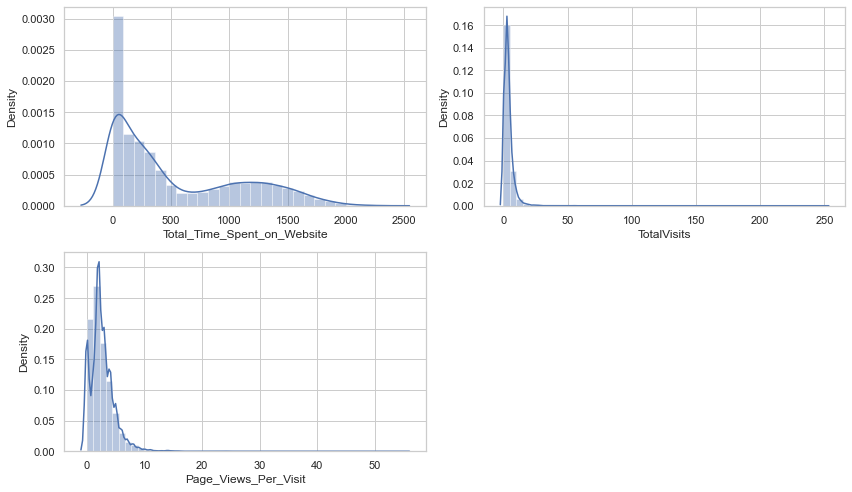

In [71]:
#Histogram
def plot_bars():
    plt.figure(figsize=(12, 7))
    
    plt.subplot(221)
    sns.distplot(leads_df['Total_Time_Spent_on_Website'])

    plt.subplot(222)
    sns.distplot(leads_df['TotalVisits'])

    plt.subplot(223)
    sns.distplot(leads_df['Page_Views_Per_Visit'])
    
    plt.tight_layout()
    plt.show()
    
plot_bars()

##### 4.2.a) Numerical Outliers:

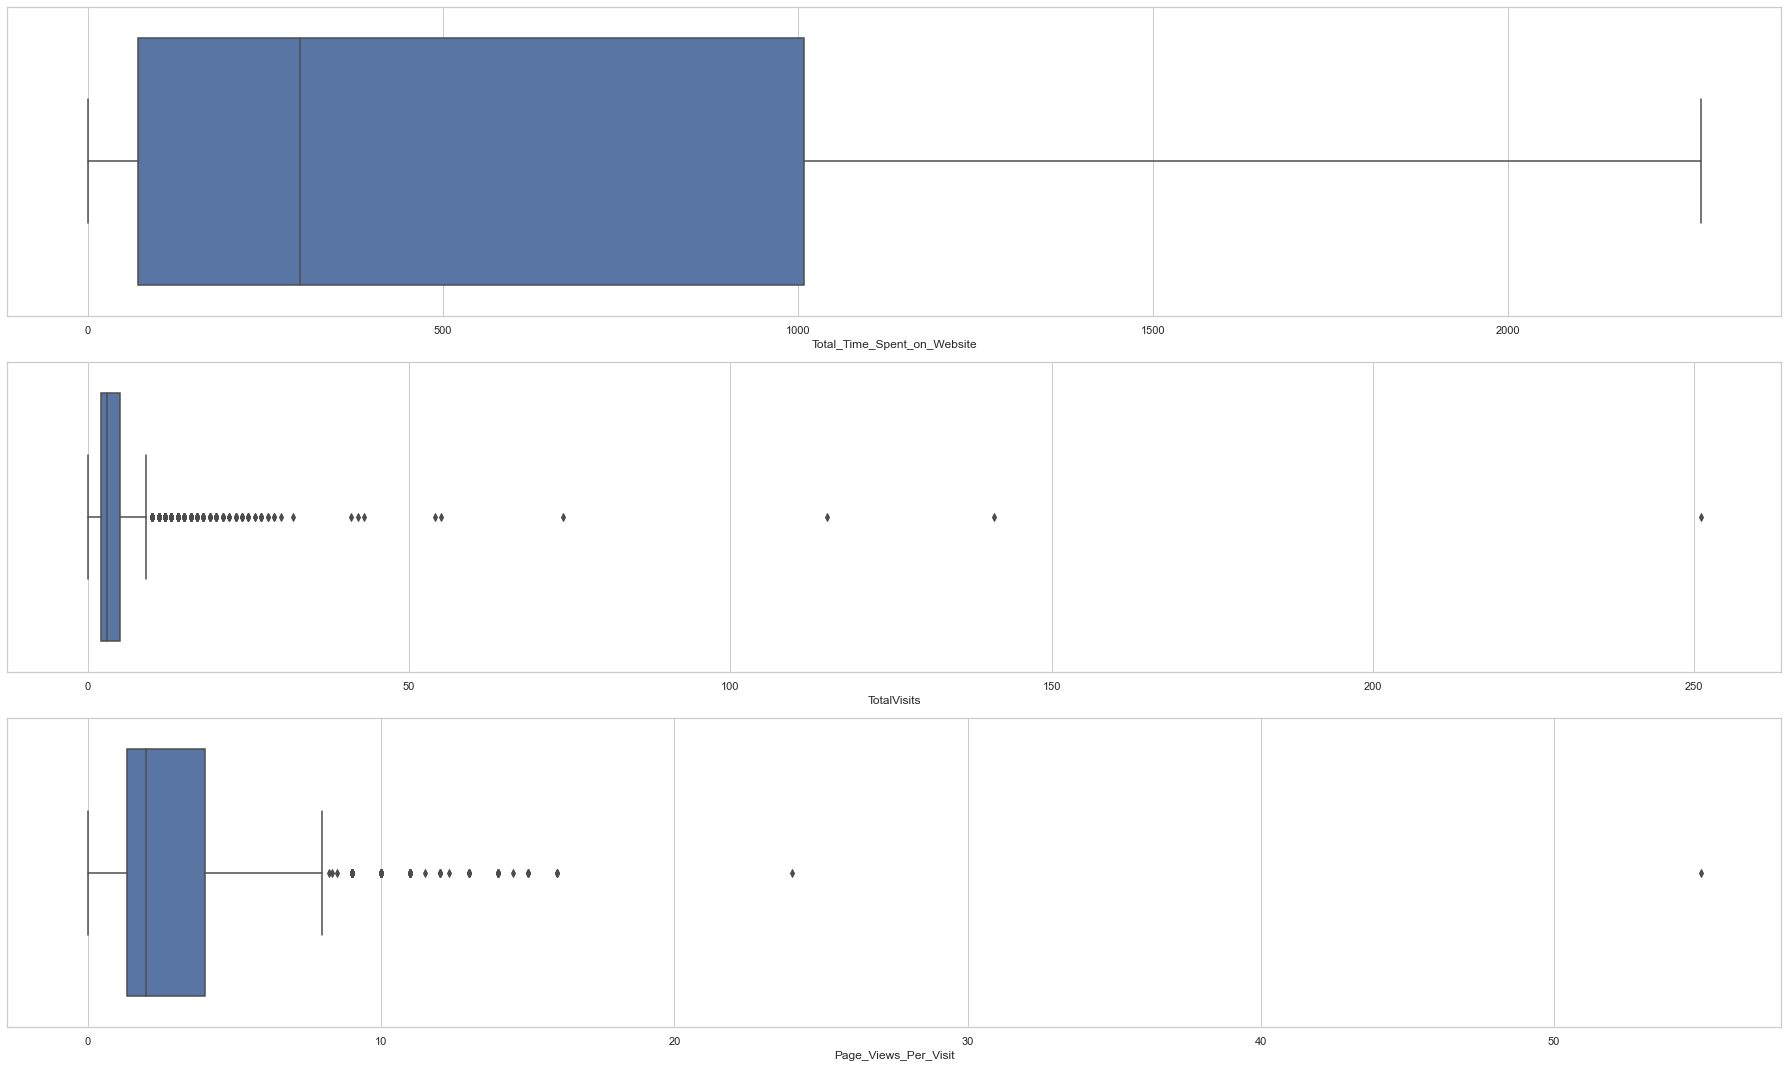

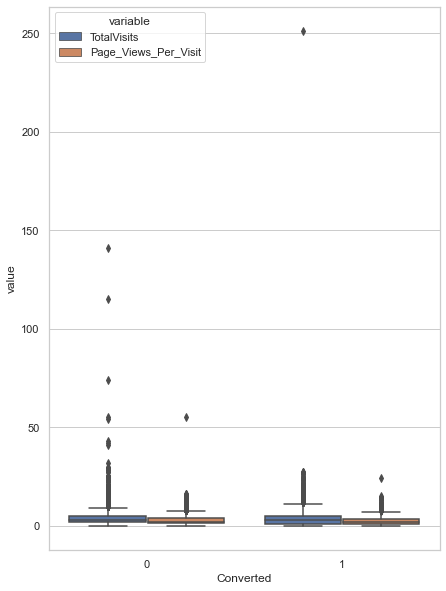

In [72]:
# Boxplots before outlier removal
num_df = leads_df[['Converted', 'Total_Time_Spent_on_Website',  'TotalVisits', 'Page_Views_Per_Visit']]

def plot_boxes():
    plt.figure(figsize=(25, 15))
    
    plt.subplot(311)
    sns.boxplot(leads_df['Total_Time_Spent_on_Website'])

    plt.subplot(312)
    sns.boxplot(leads_df['TotalVisits'])

    plt.subplot(313)
    sns.boxplot(leads_df['Page_Views_Per_Visit'])
    
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(7, 10))
    box_long = pd.melt(num_df.drop('Total_Time_Spent_on_Website', axis=1), id_vars='Converted')
    sns.boxplot(x='Converted', y='value', hue='variable', data=box_long)
    plt.show()
    
plot_boxes()

##### There has been outliers observed in the numerical columns.

In [73]:
numeric = leads_df[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9, 0.95, 0.97, 0.99, 0.995, 0.997, 0.998, 0.999])

TotalVisits  Total_Time_Spent_on_Website  Page_Views_Per_Visit
count  8378.000000                  8378.000000           8378.000000
mean      3.781690                   535.593459              2.593822
std       4.928881                   551.268108              2.113828
min       0.000000                     0.000000              0.000000
25%       2.000000                    70.250000              1.330000
50%       3.000000                   299.000000              2.000000
75%       5.000000                  1009.000000              4.000000
90%       8.000000                  1410.000000              5.000000
95%      10.000000                  1580.000000              6.000000
97%      12.000000                  1677.000000              7.000000
99%      17.000000                  1847.000000              9.000000
99.5%    21.000000                  1944.460000             11.000000
99.7%    25.000000                  1992.214000             12.286770
99.8%    27.000000                  2058.246000             14.000000
99.9%    37.607000                  2115.115000             14.811500
max     251.000000                  2272.000000             55.000000

#### Note:

Here we plan to drop the records beyond quartile % = 99

In [74]:
# Outlier --> 

out_df = num_df.drop('Converted', axis=1)
for i in out_df:
# removing outliers using the IQR
    Q1 = leads_df[i].quantile(0.01)
    Q3 = leads_df[i].quantile(0.99)
    leads_df = leads_df.loc[(leads_df[i] >= Q1) & (leads_df[i] <= Q3)]


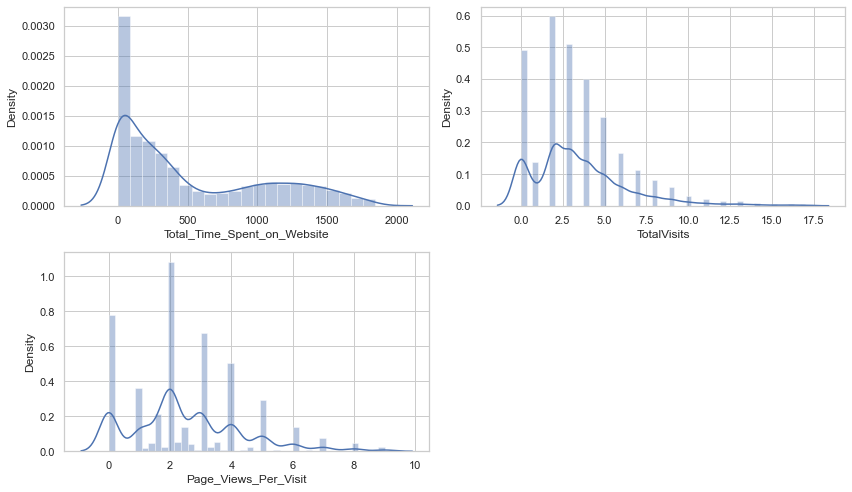

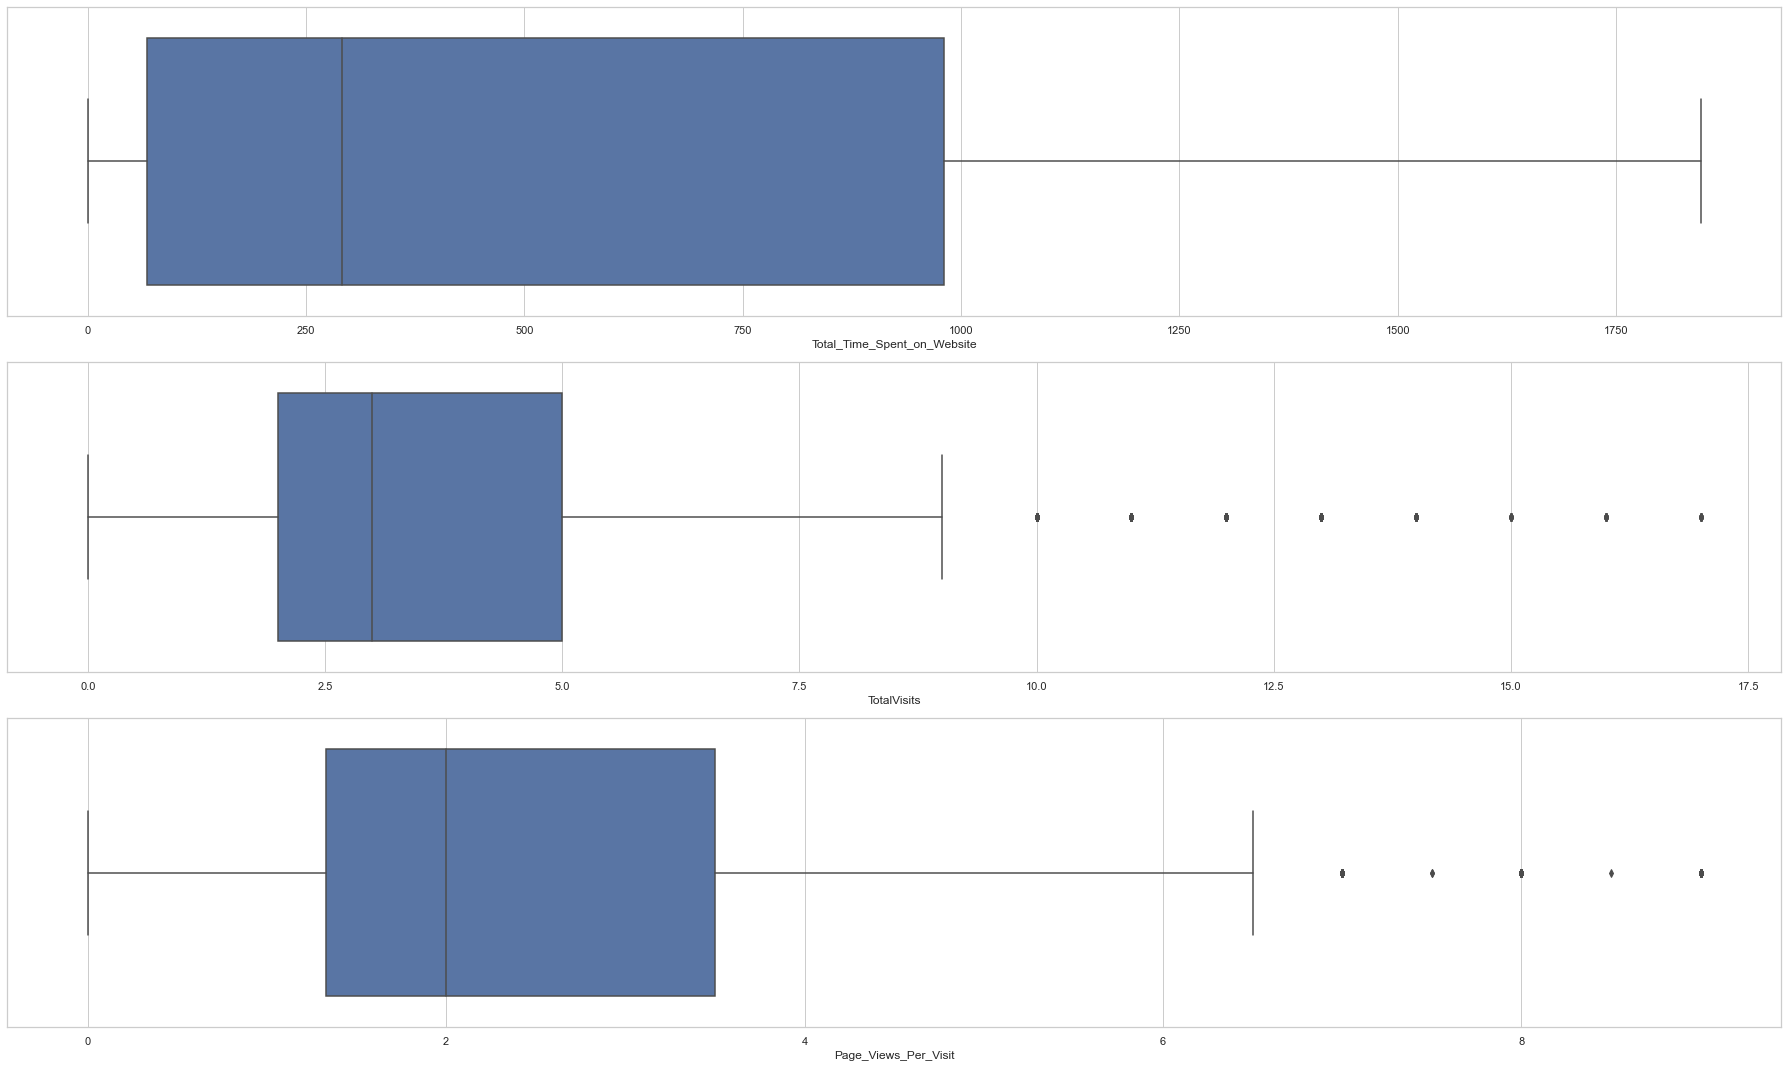

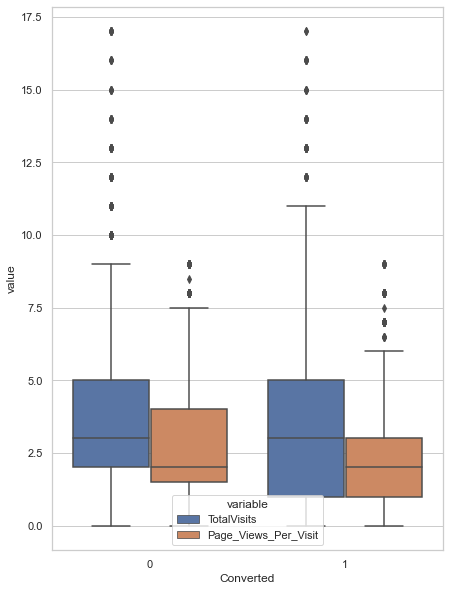

In [75]:
# After Outlier removal

num_df = leads_df[['Converted','Total_Time_Spent_on_Website',  'TotalVisits', 'Page_Views_Per_Visit']]
plot_bars()
plot_boxes()

In [76]:
leads_df.shape

(8146, 22)

### 4.3. Categorical Variables Analysis

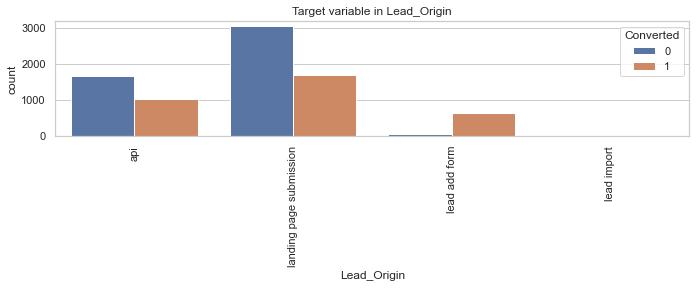

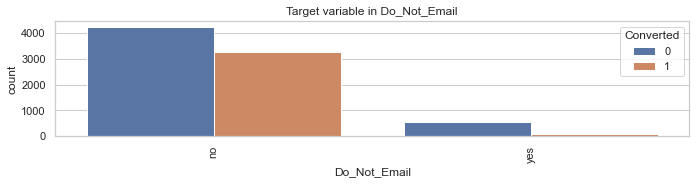

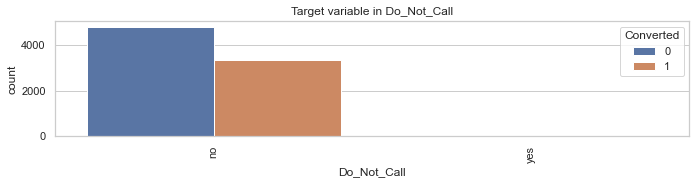

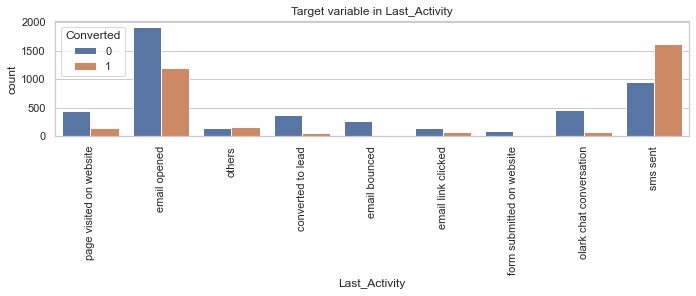

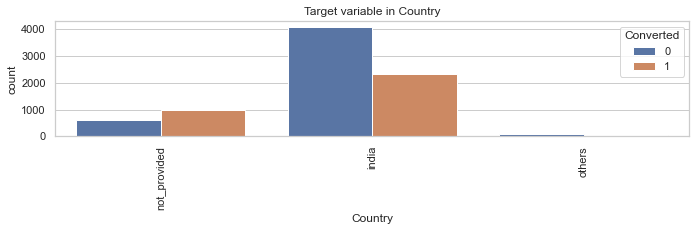

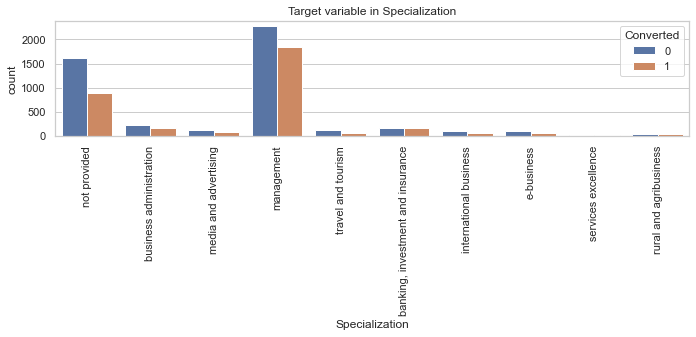

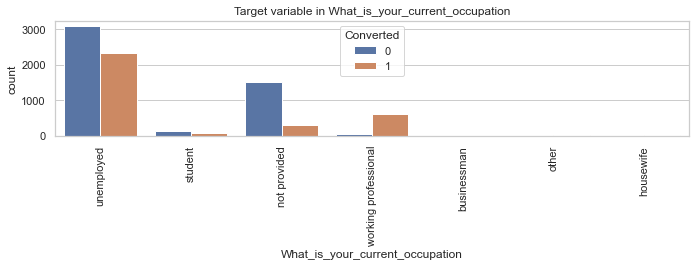

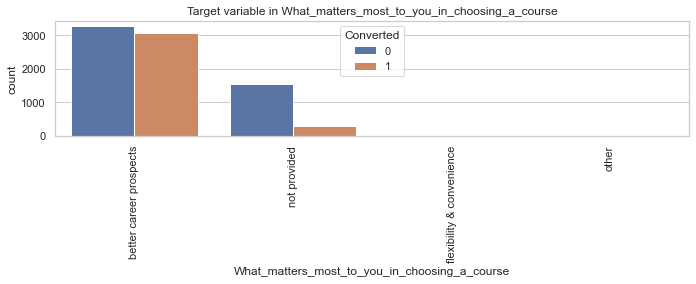

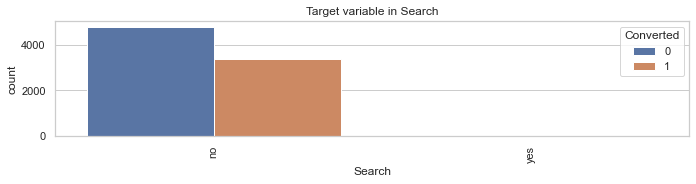

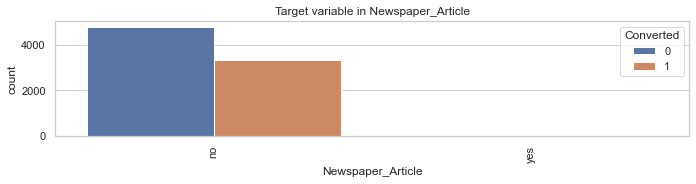

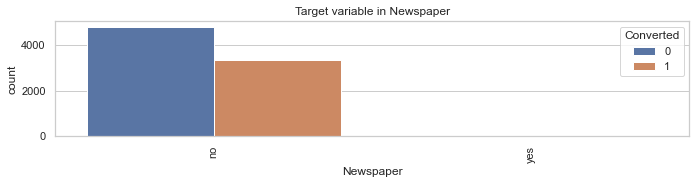

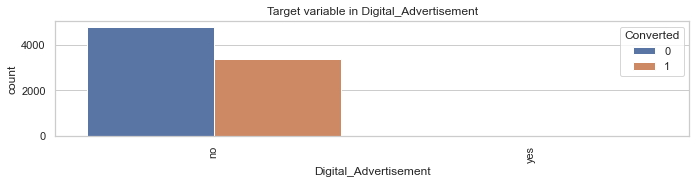

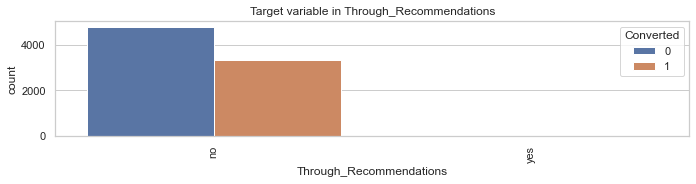

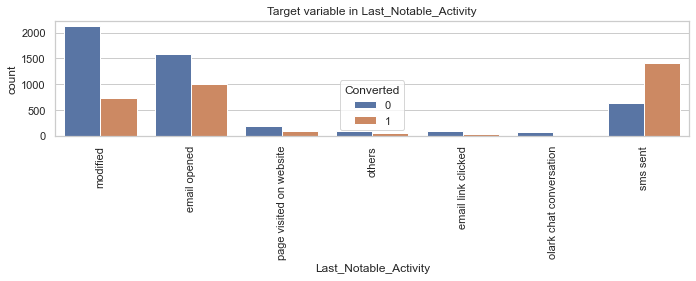

In [77]:
count = 0
conv = leads_df.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(25,25))
    count = count + 1
    plt.subplot(10,2,count)
    sns.countplot(leads_df[i], hue=leads_df.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

### Inferences

##### Lets find the maximum lead CONVERSION in each category:----

    - Lead_Origin: 
        api, landing page submission , lead add form........ all are considerable
        
        
    - Lead_Source: 
        google, reference, organic search and olark chat....... give most conversions.
        
        
    - Do_Not_Email: 
        most of the conversions........ prefer email communication.
        
        
    - Do_Not_Call: 
        not a significant column, as both types of conversion....... prefer telephonic conversation.
        
        
    - Last_Activity and Last_Notable_Activity: 
        both have maximum conversions when ........sms sent and email opened.
        
        
    - Country and City : 
        India and Mumbai.......has maximum conversions.
        
        
    - Specialization: 
        management ......has maximum conversions.
        
        
    - What_is_your_current_occupation: 
        Unemployed.......has maximum conversions.
        
        
    - What_matters_to_you_in_choosing_course: 
        Better career prospects is the dominant choice and hence is not significant.
        
        

***Few columns where there is only one answer or value is chosen to be dropped.***



In [78]:
# Columns to be dropped further 

drop_cols = ['Do_Not_Call', 'What_matters_most_to_you_in_choosing_a_course','Search', 'Newspaper_Article',
             'X_Education_Forums', 'Newspaper','Digital_Advertisement','Through_Recommendations']
leads_df.drop(drop_cols, axis = 1, inplace = True)

In [79]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead_Origin                             8146 non-null   object 
 1   Lead_Source                             8146 non-null   object 
 2   Do_Not_Email                            8146 non-null   object 
 3   Converted                               8146 non-null   int64  
 4   TotalVisits                             8146 non-null   int64  
 5   Total_Time_Spent_on_Website             8146 non-null   int64  
 6   Page_Views_Per_Visit                    8146 non-null   float64
 7   Last_Activity                           8146 non-null   object 
 8   Country                                 8146 non-null   object 
 9   Specialization                          8146 non-null   object 
 10  What_is_your_current_occupation         8146 non-null   obje

In [80]:
leads_df['Do_Not_Email'].value_counts(dropna = False)

no     7503
yes     643
Name: Do_Not_Email, dtype: int64

In [81]:
leads_df['A_free_copy_of_Mastering_The_Interview'].value_counts(dropna = False)

no     5380
yes    2766
Name: A_free_copy_of_Mastering_The_Interview, dtype: int64

In [82]:
leads_df.shape

(8146, 14)

In [83]:
# percentage rows retained
f'{round(100 * (leads_df.shape[0] / 9240))} % row is retained after missing value and outliers treatment.'

'88 % row is retained after missing value and outliers treatment.'

# 5. Dummy Variables

In [84]:
#backup 

leads_df4 = leads_df.copy()

In [85]:
#Converting Binary variables yes/No to 0 or 1

def binary_map(x):
    return x.map({'yes':1,'no':0})

cols = ['Do_Not_Email','A_free_copy_of_Mastering_The_Interview']
leads_df[cols] = leads_df[cols].apply(binary_map)

In [86]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead_Origin                             8146 non-null   object 
 1   Lead_Source                             8146 non-null   object 
 2   Do_Not_Email                            8146 non-null   int64  
 3   Converted                               8146 non-null   int64  
 4   TotalVisits                             8146 non-null   int64  
 5   Total_Time_Spent_on_Website             8146 non-null   int64  
 6   Page_Views_Per_Visit                    8146 non-null   float64
 7   Last_Activity                           8146 non-null   object 
 8   Country                                 8146 non-null   object 
 9   Specialization                          8146 non-null   object 
 10  What_is_your_current_occupation         8146 non-null   obje

In [87]:
leads_df.head()

Lead_Origin      Lead_Source  Do_Not_Email  Converted  \
0                      api  other_platforms             0          0   
1                      api   organic search             0          0   
2  landing page submission   direct traffic             0          1   
3  landing page submission   direct traffic             0          0   
4  landing page submission           google             0          1   

   TotalVisits  Total_Time_Spent_on_Website  Page_Views_Per_Visit  \
0            0                            0                   0.0   
1            5                          674                   2.5   
2            2                         1532                   2.0   
3            1                          305                   1.0   
4            2                         1428                   1.0   

             Last_Activity       Country           Specialization  \
0  page visited on website  not_provided             not provided   
1             email opened         india             not provided   
2             email opened         india  business administration   
3                   others         india    media and advertising   
4        converted to lead         india             not provided   

  What_is_your_current_occupation          City  \
0                      unemployed  not_provided   
1                      unemployed        mumbai   
2                         student        mumbai   
3                      unemployed        mumbai   
4                      unemployed        mumbai   

   A_free_copy_of_Mastering_The_Interview Last_Notable_Activity  
0                                       0              modified  
1                                       0          email opened  
2                                       1          email opened  
3                                       0              modified  
4                                       0              modified

In [88]:
dcols = leads_df.loc[:, leads_df.dtypes == 'object'].columns
dcols

Index(['Lead_Origin', 'Lead_Source', 'Last_Activity', 'Country',
       'Specialization', 'What_is_your_current_occupation', 'City',
       'Last_Notable_Activity'],
      dtype='object')

In [89]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads_df[dcols], drop_first= True)

# Add the results to the master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)

leads_df

Lead_Origin      Lead_Source  Do_Not_Email  Converted  \
0                         api  other_platforms             0          0   
1                         api   organic search             0          0   
2     landing page submission   direct traffic             0          1   
3     landing page submission   direct traffic             0          0   
4     landing page submission           google             0          1   
...                       ...              ...           ...        ...   
9235  landing page submission   direct traffic             1          1   
9236  landing page submission   direct traffic             0          0   
9237  landing page submission   direct traffic             1          0   
9238  landing page submission           google             0          1   
9239  landing page submission   direct traffic             0          1   

      TotalVisits  Total_Time_Spent_on_Website  Page_Views_Per_Visit  \
0               0                            0                  0.00   
1               5                          674                  2.50   
2               2                         1532                  2.00   
3               1                          305                  1.00   
4               2                         1428                  1.00   
...           ...                          ...                   ...   
9235            8                         1845                  2.67   
9236            2                          238                  2.00   
9237            2                          199                  2.00   
9238            3                          499                  3.00   
9239            6                         1279                  3.00   

                Last_Activity       Country           Specialization  \
0     page visited on website  not_provided             not provided   
1                email opened         india             not provided   
2                email opened         india  business administration   
3                      others         india    media and advertising   
4           converted to lead         india             not provided   
...                       ...           ...                      ...   
9235                   others         india               management   
9236                 sms sent         india    media and advertising   
9237                 sms sent         india  business administration   
9238                 sms sent         india               management   
9239                 sms sent        others               management   

     What_is_your_current_occupation                City  \
0                         unemployed        not_provided   
1                         unemployed              mumbai   
2                            student              mumbai   
3                         unemployed              mumbai   
4                         unemployed              mumbai   
...                              ...                 ...   
9235                      unemployed              mumbai   
9236                      unemployed              mumbai   
9237                      unemployed              mumbai   
9238                    not provided  other metro cities   
9239                      unemployed        other cities   

      A_free_copy_of_Mastering_The_Interview Last_Notable_Activity  \
0                                          0              modified   
1                                          0          email opened   
2                                          1          email opened   
3                                          0              modified   
4                                          0              modified   
...                                      ...                   ...   
9235                                       0                others   
9236                                       1              sms sent   
9237                                

In [90]:
leads_df.drop(dcols, axis = 1, inplace = True)
leads_df.shape

(8146, 51)

In [91]:
#leads_df_dum.drop(drop_cols, axis = 1, inplace = True)
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do_Not_Email                                          8146 non-null   int64  
 1   Converted                                             8146 non-null   int64  
 2   TotalVisits                                           8146 non-null   int64  
 3   Total_Time_Spent_on_Website                           8146 non-null   int64  
 4   Page_Views_Per_Visit                                  8146 non-null   float64
 5   A_free_copy_of_Mastering_The_Interview                8146 non-null   int64  
 6   Lead_Origin_landing page submission                   8146 non-null   uint8  
 7   Lead_Origin_lead add form                             8146 non-null   uint8  
 8   Lead_Origin_lead import                               8146

In [92]:
### Checking the conversion rate
conversion_rate = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
conversion_rate

41.173582126196905

# 6. Splitting into test and train data

In the ratio of 30:70

In [93]:
leads_df_f = leads_df.copy()

In [94]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads_df_f.drop(['Converted'], axis=1)

# storing response variable to y
y = leads_df_f['Converted']

In [95]:
X.head()

Do_Not_Email  TotalVisits  Total_Time_Spent_on_Website  \
0             0            0                            0   
1             0            5                          674   
2             0            2                         1532   
3             0            1                          305   
4             0            2                         1428   

   Page_Views_Per_Visit  A_free_copy_of_Mastering_The_Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead_Origin_landing page submission  Lead_Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_lead import  Lead_Source_facebook  Lead_Source_google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead_Source_organic search  Lead_Source_other_platforms  \
0                           0                            1   
1                           1                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   Lead_Source_reference  Last_Activity_email bounced  \
0                      0                            0   
1                      0                            0   
2                      0                            0   
3                      0                            0   
4                      0                            0   

   Last_Activity_email link clicked  Last_Activity_email opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last_Activity_form submitted on website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last_Activity_olark chat conversation  Last_Activity_others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last_Activity_page visited on website  Last_Activity_sms sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Country_not_provided  Country_others  \
0                     1               0   
1                     0               0   
2                     0               0   
3          

In [96]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [97]:
# Splitting the data into train and test

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify = y)

In [98]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)
print("X_test Size", X_test.shape)
print("y_test Size", y_test.shape)

X_train Size (5702, 50)
y_train Size (5702,)
X_test Size (2444, 50)
y_test Size (2444,)


In [99]:
y_train.value_counts(normalize = True)

0    0.588215
1    0.411785
Name: Converted, dtype: float64

In [100]:
y_test.value_counts(normalize = True)

0    0.58838
1    0.41162
Name: Converted, dtype: float64

## 6.1 Feature Scaling

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

cont_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])
X_train.head()    

Do_Not_Email  TotalVisits  Total_Time_Spent_on_Website  \
740      -0.294124    -0.163949                    -0.713096   
367      -0.294124     0.542120                     0.548270   
4792      3.399922    -1.223051                    -0.974782   
7777     -0.294124    -1.223051                    -0.974782   
8135      3.399922    -0.516983                     0.744064   

      Page_Views_Per_Visit  A_free_copy_of_Mastering_The_Interview  \
740               0.264140                               -0.709713   
367               1.349886                               -0.709713   
4792             -1.364479                               -0.709713   
7777             -1.364479                               -0.709713   
8135             -0.278733                                1.409021   

      Lead_Origin_landing page submission  Lead_Origin_lead add form  \
740                                     1                          0   
367                                     0                          0   
4792                                    0                          0   
7777                                    0                          0   
8135                                    1                          0   

      Lead_Origin_lead import  Lead_Source_facebook  Lead_Source_google  \
740                         0                     0                   1   
367                         0                     0                   0   
4792                        0                     0                   0   
7777                        0                     0                   0   
8135                        0                     0                   0   

      Lead_Source_organic search  Lead_Source_other_platforms  \
740                            0                            0   
367                            0                            0   
4792                           0                            1   
7777                           0                            1   
8135                           0                            0   

      Lead_Source_reference  Last_Activity_email bounced  \
740                       0                            0   
367                       1                            0   
4792                      0                            1   
7777                      0                            0   
8135                      0                            0   

      Last_Activity_email link clicked  Last_Activity_email opened  \
740                                  0                           1   
367                                  0                           0   
4792                                 0                           0   
7777                                 0                           0   
8135                                 0                           0   

      Last_Activity_form submitted on website  \
740                                         0   
367                                         0   
4792                                        0   
7777                                        0   
8135                                        0   

      Last_Activity_olark chat conversation  Last_Activity_others  \
740                                       0                     0   
367                                       0                     0   
4792                                      0                     0   
7777                                      1                     0   
8135                                      0                     0   

      Last_Activity_page visited on website  Last_Activity_sms sent  \
740                                       0                       0   
367                                       1                       0   
4792                                      0                       0   
7777                                      0                       0   
8135                                      0                       1   

      

In [103]:
X_train[cont_cols].describe()

Do_Not_Email   TotalVisits  Total_Time_Spent_on_Website  \
count  5.702000e+03  5.702000e+03                 5.702000e+03   
mean  -8.335435e-17 -2.696312e-16                -1.280787e-16   
std    1.000088e+00  1.000088e+00                 1.000088e+00   
min   -2.941244e-01 -1.223051e+00                -9.747817e-01   
25%   -2.941244e-01 -5.169827e-01                -8.448799e-01   
50%   -2.941244e-01 -1.639485e-01                -4.269351e-01   
75%   -2.941244e-01  5.421198e-01                 8.659641e-01   
max    3.399922e+00  4.778530e+00                 2.502444e+00   

       Page_Views_Per_Visit  A_free_copy_of_Mastering_The_Interview  
count          5.702000e+03                            5.702000e+03  
mean           1.154227e-16                           -1.962653e-17  
std            1.000088e+00                            1.000088e+00  
min           -1.364479e+00                           -7.097126e-01  
25%           -6.424580e-01                           -7.097126e-01  
50%           -2.787331e-01                           -7.097126e-01  
75%            5.355762e-01                            1.409021e+00  
max            3.521377e+00                            1.409021e+00

### 6.2 Checking the correlations

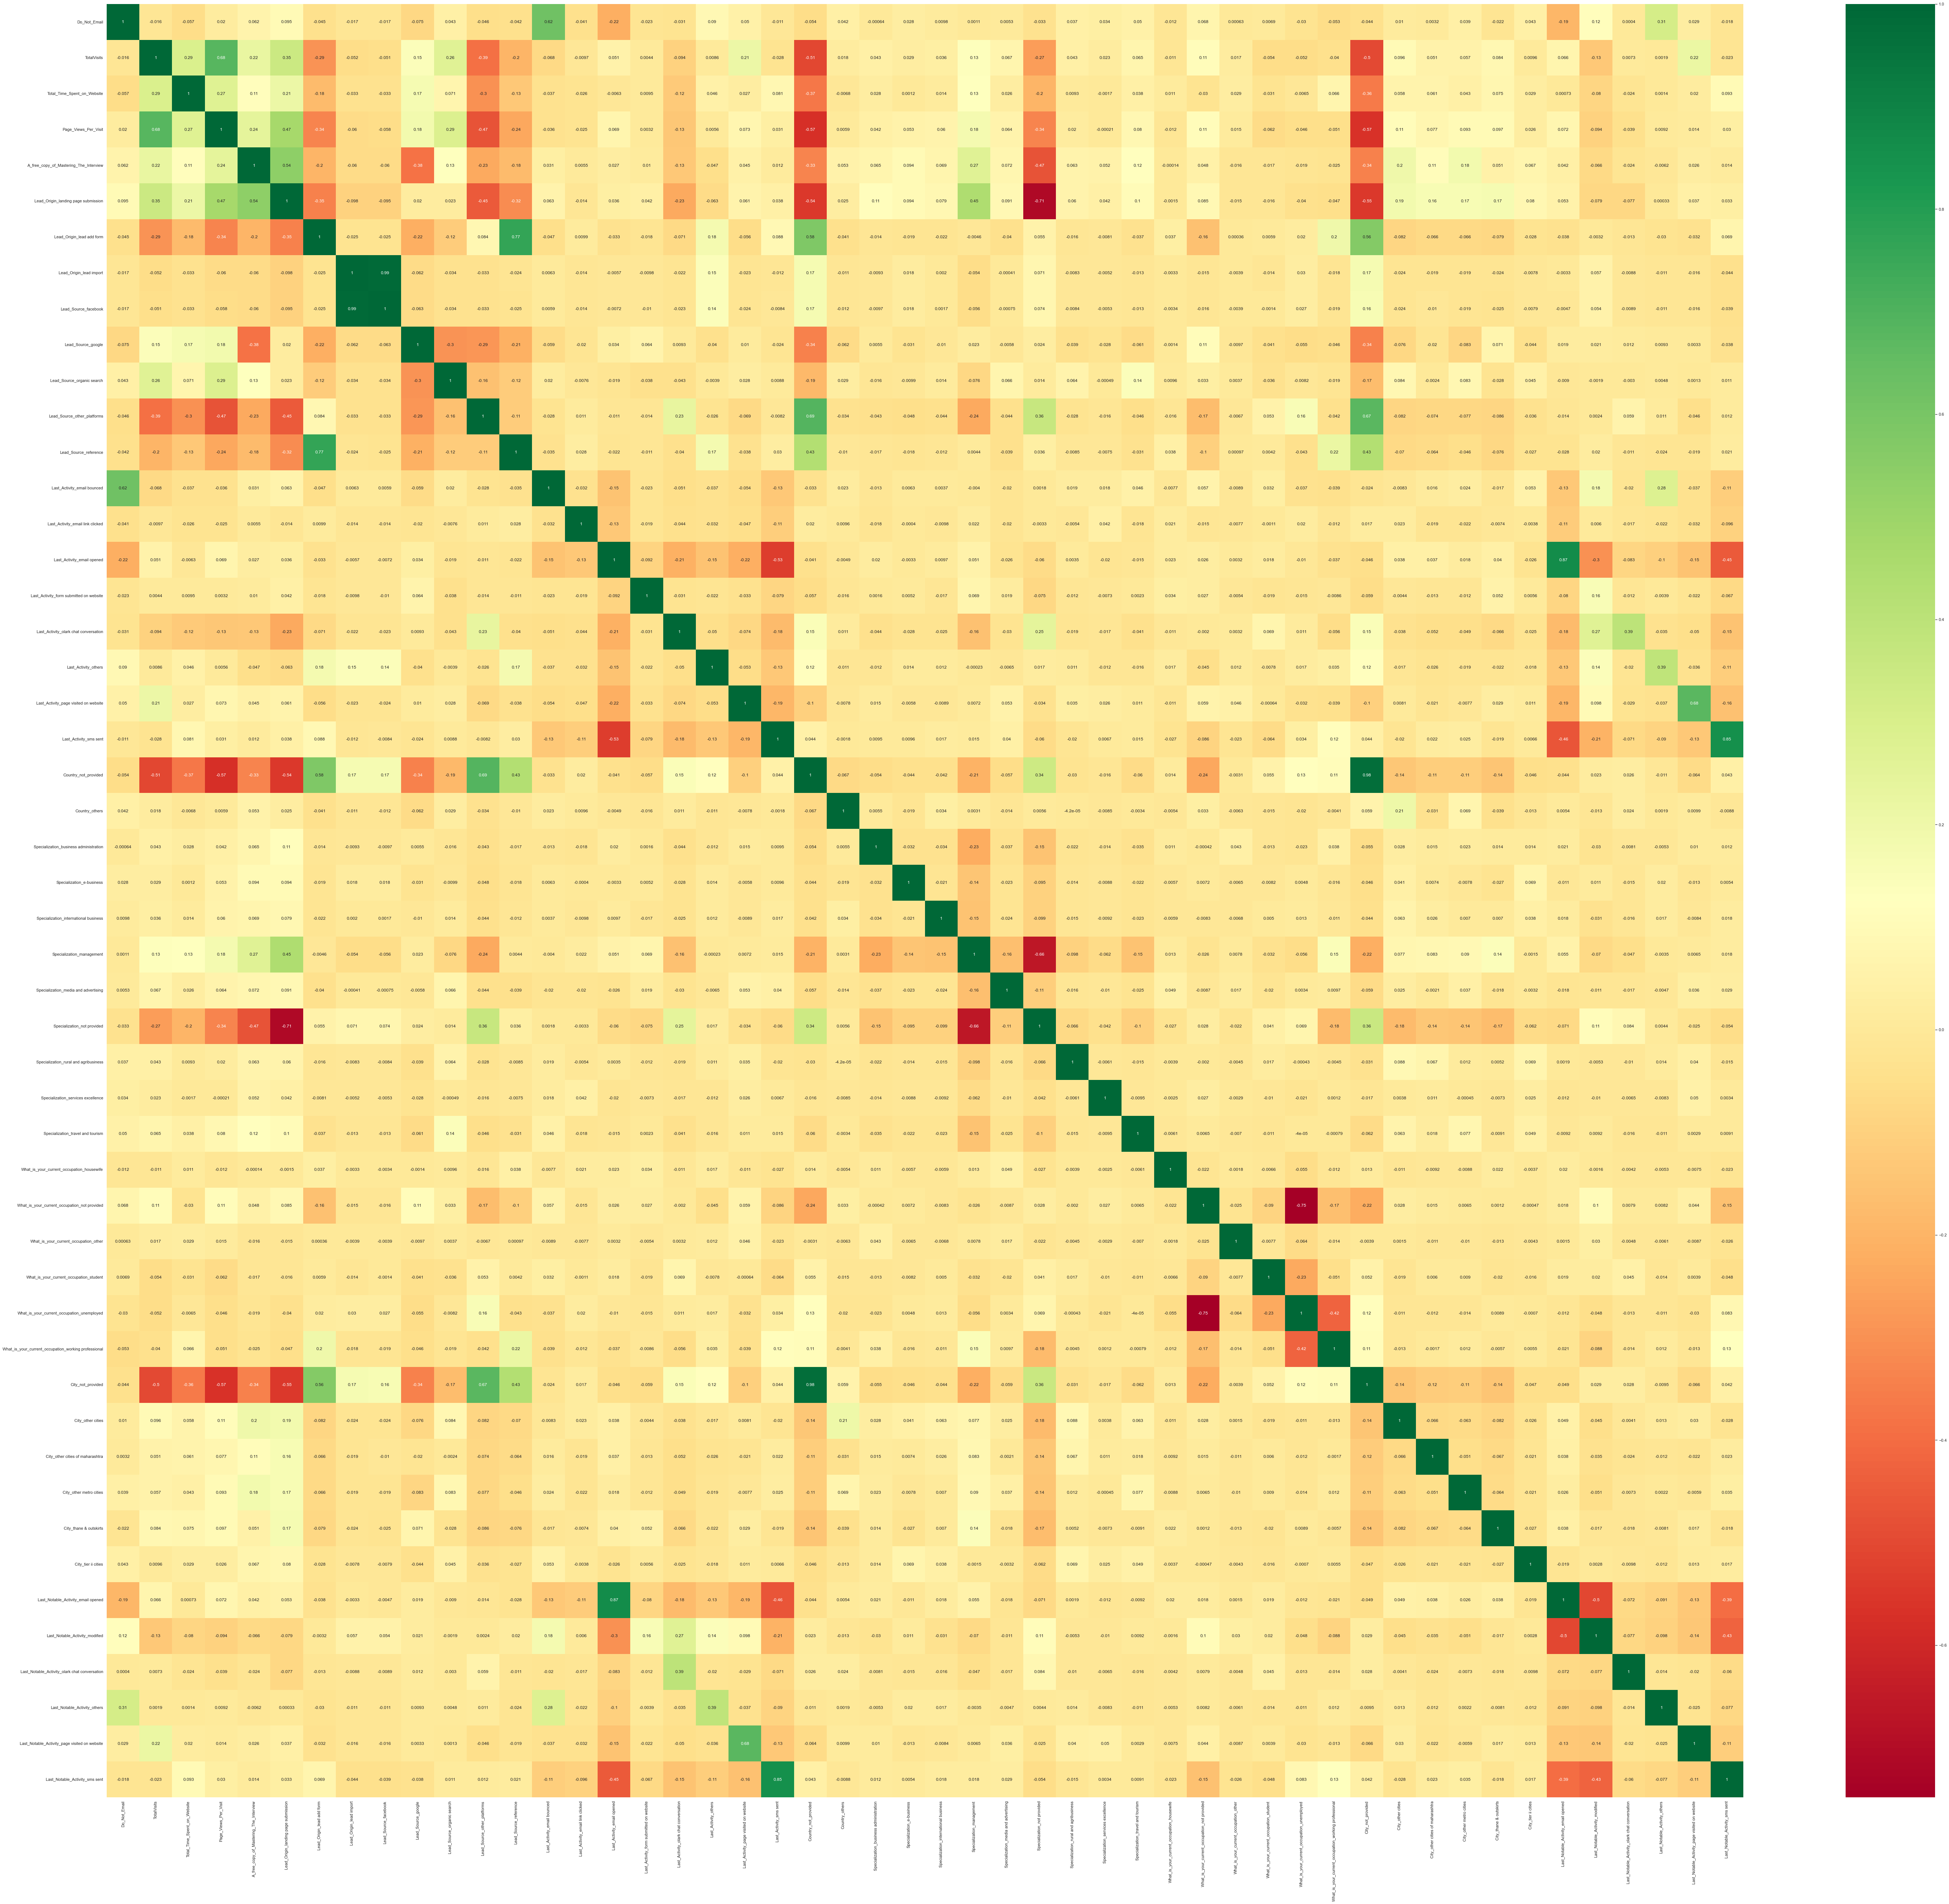

In [104]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,90))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [105]:
X_train = X_train.drop(['Lead_Origin_lead import', 'Lead_Source_facebook', 
                      'City_not_provided', 'Country_not_provided', 'What_is_your_current_occupation_not provided'
                      ], axis = 1)

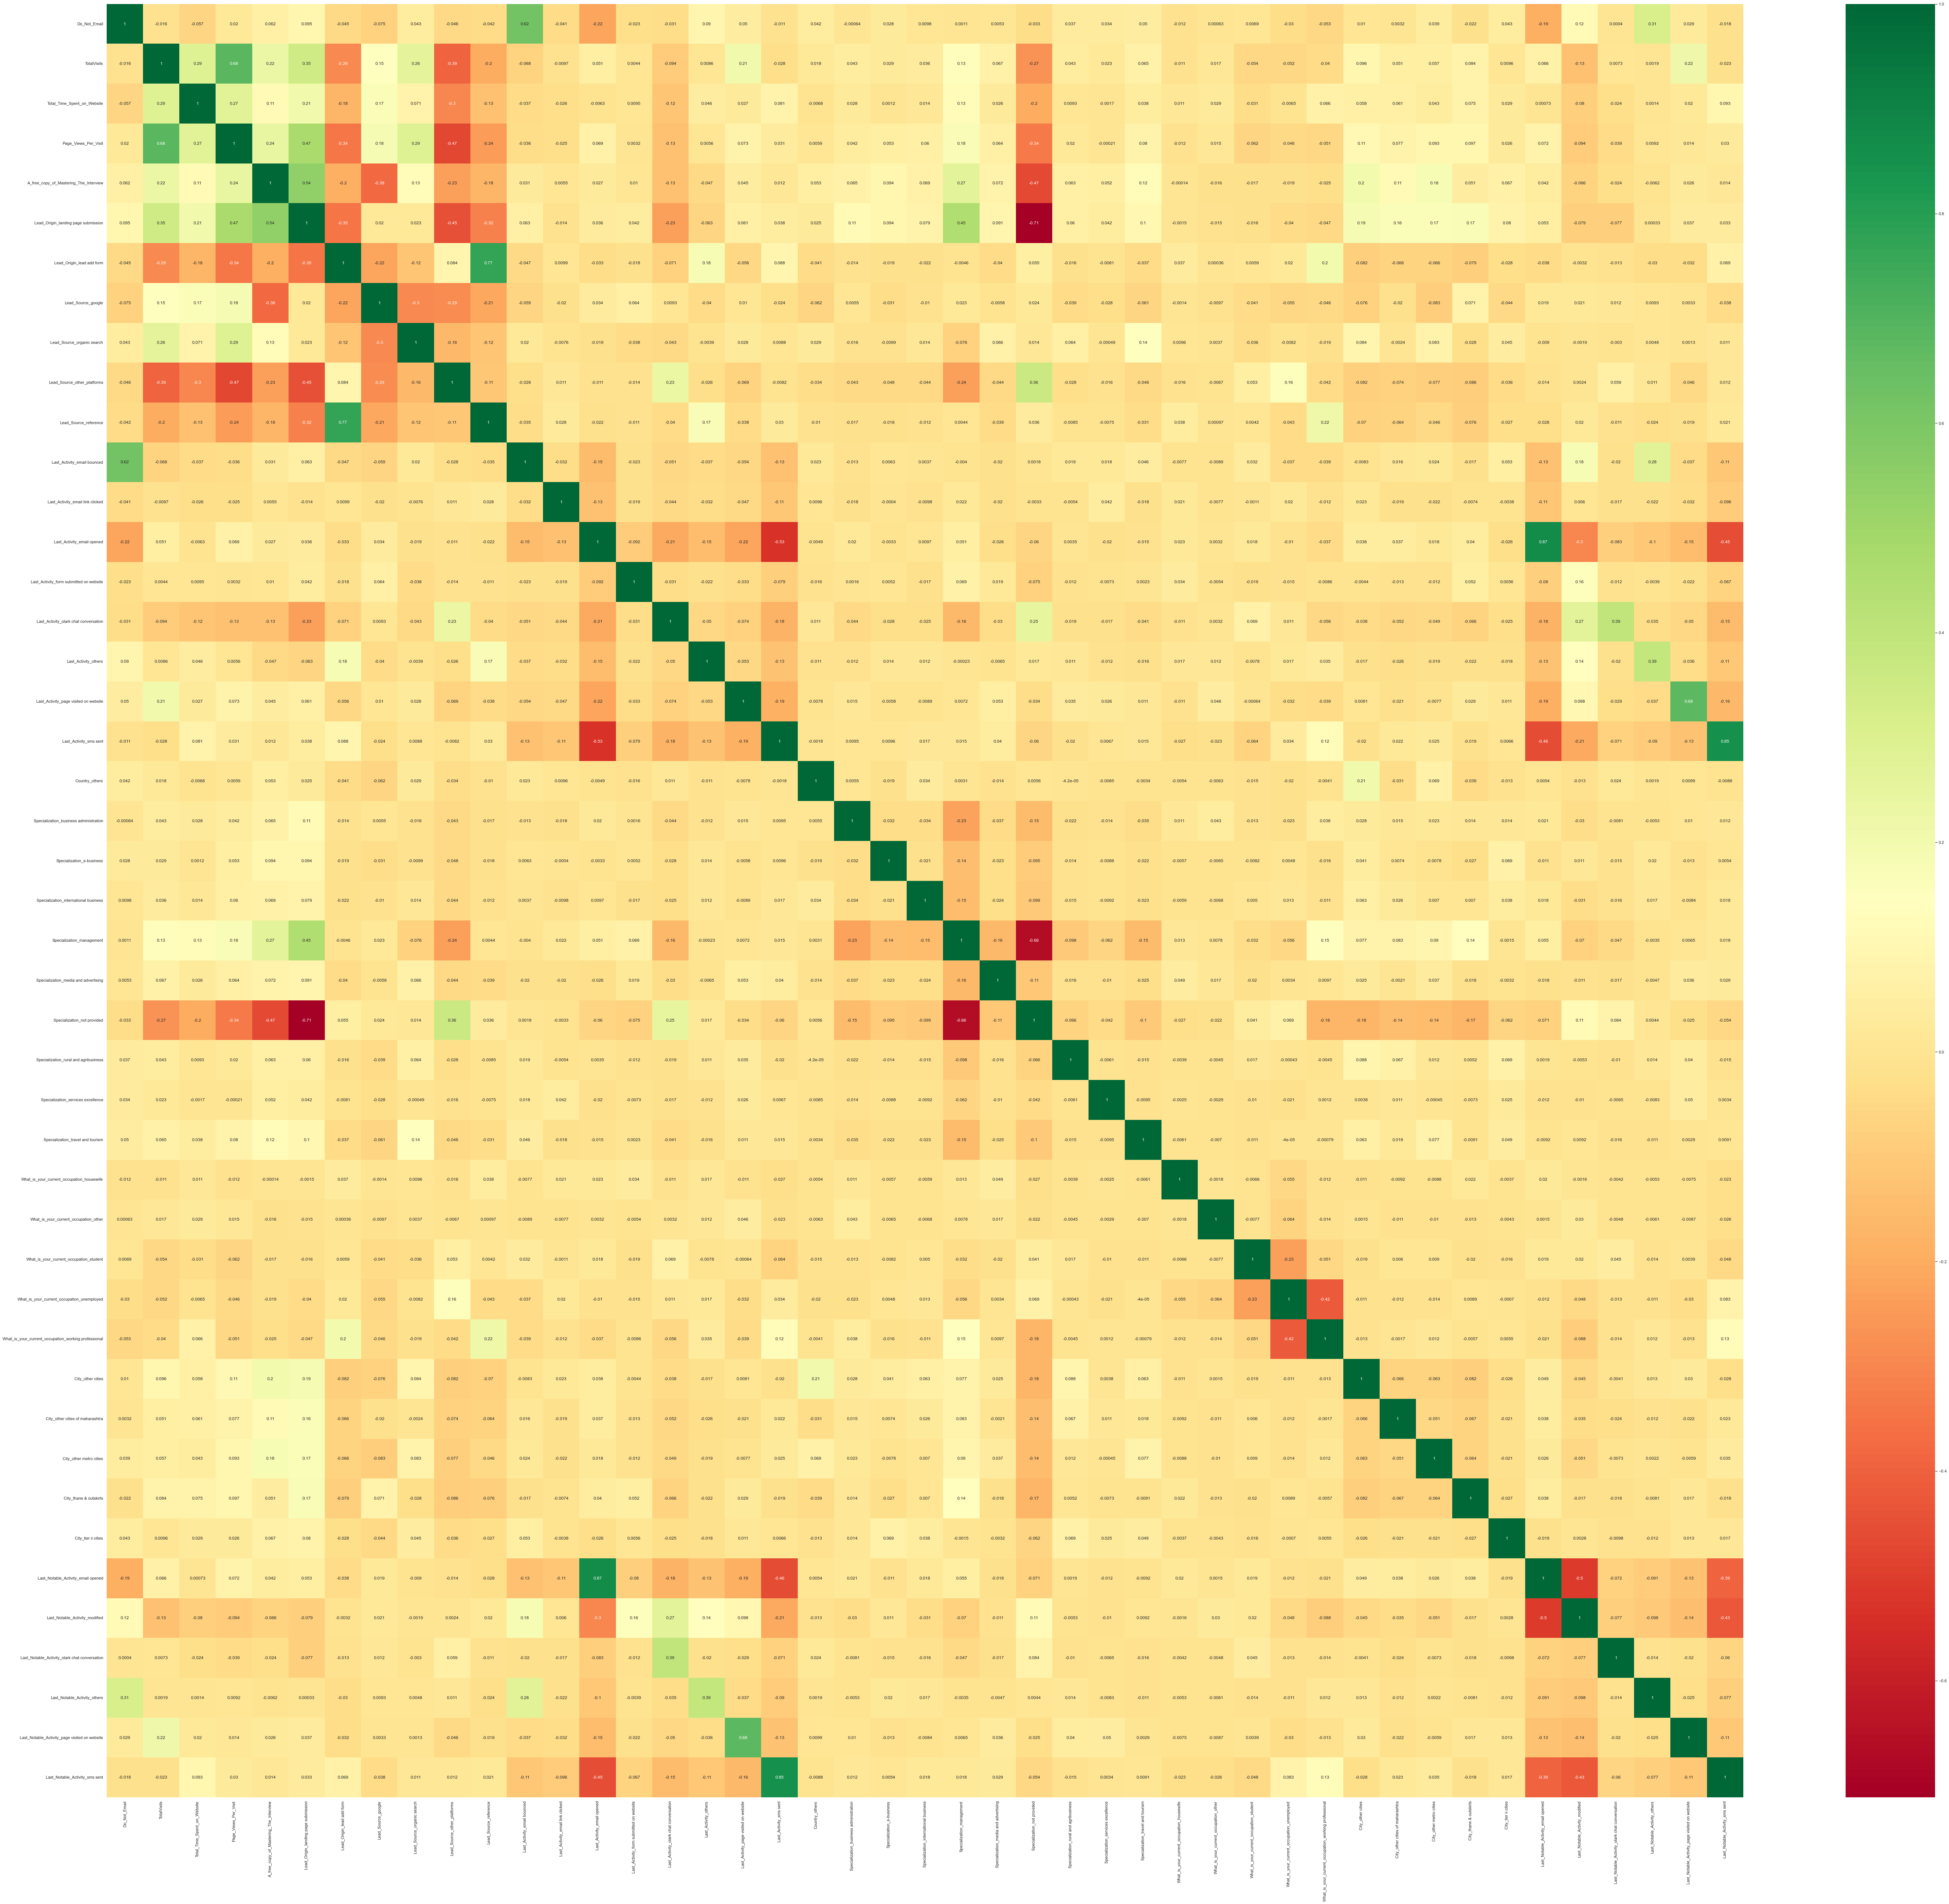

In [106]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,90))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True, cmap="RdYlGn")
plt.show()

Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE

#  7. Model Building

### 7.1 ***Balanced Approach - Recursive Feature Elimination + Manual Elimination***

  - **RFE** : This will help to select top 15 important and significant variables, thereby eliminating almost half of the columns.
      
  - **Manual Elimination** : This will help to drop the highest VIF variable one by one in each model.

In [107]:
# Importing RFE and LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [108]:
# Running RFE with 15 variables as output

logreg = LogisticRegression()
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)


In [109]:
# Features that have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', False, 6),
 ('TotalVisits', False, 16),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 15),
 ('A_free_copy_of_Mastering_The_Interview', False, 26),
 ('Lead_Origin_landing page submission', True, 1),
 ('Lead_Origin_lead add form', True, 1),
 ('Lead_Source_google', False, 13),
 ('Lead_Source_organic search', False, 14),
 ('Lead_Source_other_platforms', True, 1),
 ('Lead_Source_reference', False, 27),
 ('Last_Activity_email bounced', False, 8),
 ('Last_Activity_email link clicked', True, 1),
 ('Last_Activity_email opened', True, 1),
 ('Last_Activity_form submitted on website', False, 22),
 ('Last_Activity_olark chat conversation', False, 5),
 ('Last_Activity_others', False, 12),
 ('Last_Activity_page visited on website', False, 25),
 ('Last_Activity_sms sent', True, 1),
 ('Country_others', False, 30),
 ('Specialization_business administration', False, 20),
 ('Specialization_e-business', False, 7),
 ('Specialization_international business', Fa

In [110]:
# Feature columns selected by RFE
col = X_train.columns[rfe.support_]
col


Index(['Total_Time_Spent_on_Website', 'Lead_Origin_landing page submission',
       'Lead_Origin_lead add form', 'Lead_Source_other_platforms',
       'Last_Activity_email link clicked', 'Last_Activity_email opened',
       'Last_Activity_sms sent', 'Specialization_not provided',
       'What_is_your_current_occupation_housewife',
       'What_is_your_current_occupation_student',
       'What_is_your_current_occupation_unemployed',
       'What_is_your_current_occupation_working professional',
       'Last_Notable_Activity_others',
       'Last_Notable_Activity_page visited on website',
       'Last_Notable_Activity_sms sent'],
      dtype='object')

In [111]:
# Selecting columns selected by RFE
X_train_rfe = X_train[col]
X_train_rfe.head()

Total_Time_Spent_on_Website  Lead_Origin_landing page submission  \
740                     -0.713096                                    1   
367                      0.548270                                    0   
4792                    -0.974782                                    0   
7777                    -0.974782                                    0   
8135                     0.744064                                    1   

      Lead_Origin_lead add form  Lead_Source_other_platforms  \
740                           0                            0   
367                           0                            0   
4792                          0                            1   
7777                          0                            1   
8135                          0                            0   

      Last_Activity_email link clicked  Last_Activity_email opened  \
740                                  0                           1   
367                                  0                           0   
4792                                 0                           0   
7777                                 0                           0   
8135                                 0                           0   

      Last_Activity_sms sent  Specialization_not provided  \
740                        0                            0   
367                        0                            1   
4792                       0                            1   
7777                       0                            1   
8135                       1                            0   

      What_is_your_current_occupation_housewife  \
740                                           0   
367                                           0   
4792                                          0   
7777                                          0   
8135                                          0   

      What_is_your_current_occupation_student  \
740                                         0   
367                                         0   
4792                                        1   
7777                                        0   
8135                                        0   

      What_is_your_current_occupation_unemployed  \
740                                            0   
367                                            0   
4792                                           0   
7777                                           1   
8135                                           0   

      What_is_your_current_occupation_working professional  \
740                                                      0   
367                                                      0   
4792                                                     0   
7777                                                     0   
8135                                                     0   

      Last_Notable_Activity_others  \
740                              0   
367                              0   
4792                             1   
7777                             0   
8135                             0   

      Last_Notable_Activity_page visited on website  \
740                                               0   
367                                               0   
4792                                              0   
7777                                              0   
8135                                              0   

      Last_Notable_Activity_sms sent  
740                                0  
367                                0  
4792                               0  
7777                               0  
8135                               1

##### **Required conditions for feature selection :**

**1. p-value < 0.05** -- Drop features which are the least helpful in prediction (drop p-value > 0.05).

**2. VIF < 5** -- Drop features that are redundant using correlations and VIF (drop VIF > 5).

**Variance Inflation Factor or VIF**, 

gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating 'VIF' is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [112]:
# Importing statsmodels
import statsmodels.api as sm

# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
# Function for building the model

def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    print(res.summary())    # Summary of the model 
    return X_train_sm, res

# Function for VIF Calculation

def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

### Model 1

In [114]:
# col contains the list of columns from RFE approach

#col = X_train.columns[rfe.support_]
X_train_model1 = X_train_rfe

X1, result = build_model(col)
get_vif(X_train_model1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5686
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2362.1
Date:                Wed, 21 Sep 2022   Deviance:                       4724.3
Time:                        00:48:30   Pearson chi2:                 6.14e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Features   VIF
6                                 Last_Activity_sms sent  5.89
14                        Last_Notable_Activity_sms sent  4.95
10            What_is_your_current_occupation_unemployed  3.44
1                    Lead_Origin_landing page submission  3.29
5                             Last_Activity_email opened  2.29
7                            Specialization_not provided  1.93
3                            Lead_Source_other_platforms  1.58
11  What_is_your_current_occupation_working professional  1.38
2                              Lead_Origin_lead add form  1.36
0                            Total_Time_Spent_on_Website  1.17
13         Last_Notable_Activity_page visited on website  1.12
9                What_is_your_current_occupation_student  1.11
4                       Last_Activity_email link clicked  1.09
12                          Last_Notable_Activity_others  1.06
8              What_is_your_current_occupation_housewife  1.01

### Model 2

Dropping column 'Last_Activity_sms sent' due to high VIF

In [115]:
X_train_model2 = X_train_model1.drop(['Last_Activity_sms sent'], axis = 1)
col = X_train_model2.columns

X2, result = build_model(col)
get_vif(X_train_model2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5687
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2397.2
Date:                Wed, 21 Sep 2022   Deviance:                       4794.5
Time:                        00:48:30   Pearson chi2:                 6.43e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Features   VIF
9             What_is_your_current_occupation_unemployed  3.44
1                    Lead_Origin_landing page submission  2.96
5                             Last_Activity_email opened  2.08
13                        Last_Notable_Activity_sms sent  1.88
6                            Specialization_not provided  1.85
3                            Lead_Source_other_platforms  1.57
10  What_is_your_current_occupation_working professional  1.37
2                              Lead_Origin_lead add form  1.32
0                            Total_Time_Spent_on_Website  1.17
8                What_is_your_current_occupation_student  1.11
12         Last_Notable_Activity_page visited on website  1.10
4                       Last_Activity_email link clicked  1.08
11                          Last_Notable_Activity_others  1.05
7              What_is_your_current_occupation_housewife  1.01

### Model 3

Dropping the column - What_is_your_current_occupation_housewife

In [116]:
X_train_model3 = X_train_model2.drop(['What_is_your_current_occupation_housewife'], axis = 1)
col = X_train_model3.columns

X3, result = build_model(col)
get_vif(X_train_model3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5688
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2407.5
Date:                Wed, 21 Sep 2022   Deviance:                       4815.0
Time:                        00:48:30   Pearson chi2:                 6.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Features   VIF
8             What_is_your_current_occupation_unemployed  3.43
1                    Lead_Origin_landing page submission  2.95
5                             Last_Activity_email opened  2.07
12                        Last_Notable_Activity_sms sent  1.88
6                            Specialization_not provided  1.85
3                            Lead_Source_other_platforms  1.57
9   What_is_your_current_occupation_working professional  1.37
2                              Lead_Origin_lead add form  1.32
0                            Total_Time_Spent_on_Website  1.17
7                What_is_your_current_occupation_student  1.11
11         Last_Notable_Activity_page visited on website  1.10
4                       Last_Activity_email link clicked  1.08
10                          Last_Notable_Activity_others  1.05

### Model 4

Dropping column - 'Last_Activity_email link clicked'

In [117]:
#X_train_model4 = X_train_model3.drop(['What_is_your_current_occupation_other'], axis = 1)
X_train_model4 = X_train_model3.drop(['Last_Activity_email link clicked'], axis = 1)
col = X_train_model4.columns

X4, result = build_model(col)
get_vif(X_train_model4)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5702
Model:                            GLM   Df Residuals:                     5689
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2411.3
Date:                Wed, 21 Sep 2022   Deviance:                       4822.5
Time:                        00:48:31   Pearson chi2:                 6.50e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Features   VIF
7             What_is_your_current_occupation_unemployed  3.39
1                    Lead_Origin_landing page submission  2.90
4                             Last_Activity_email opened  2.00
5                            Specialization_not provided  1.84
11                        Last_Notable_Activity_sms sent  1.82
3                            Lead_Source_other_platforms  1.57
8   What_is_your_current_occupation_working professional  1.36
2                              Lead_Origin_lead add form  1.32
0                            Total_Time_Spent_on_Website  1.17
6                What_is_your_current_occupation_student  1.11
10         Last_Notable_Activity_page visited on website  1.09
9                           Last_Notable_Activity_others  1.05

# 8. Model Evaluation (Train Data)

### 8.1 Model Predictions 
***MODEL 4*** looks quite stable, hence going forward with it.

In [118]:
# Predicting on the train set -> model 4

y_train_pred = result.predict(X4)
y_train_pred[:10]

740     0.062696
367     0.109030
4792    0.273570
7777    0.155803
8135    0.540611
8588    0.310726
6516    0.051696
6315    0.905660
129     0.072061
1102    0.834979
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)

# To create a dataframe to store original and predicted values
y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Conversion_Prob'] = y_train_pred
y_train_pred_final.head()

Lead ID  Converted  Conversion_Prob
0      740          0         0.062696
1      367          0         0.109030
2     4792          0         0.273570
3     7777          0         0.155803
4     8135          0         0.540611

### 8.2 Metrics with 0.5 cutoff

#### Creating a new column - Predicted 
where 
- 1 => prob > 0.5 and 
- 0 => when prob is <=0.5

In [120]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead ID  Converted  Conversion_Prob  predicted
0      740          0         0.062696          0
1      367          0         0.109030          0
2     4792          0         0.273570          0
3     7777          0         0.155803          0
4     8135          0         0.540611          1

In [121]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score


# Finding Accuracy, Recall, Precision, f1_score on Train data model with 0.5 cutoff

print("Accuracy, Sensitivity, Specificity, FPR, Recall, Precision, F1_score on TRAINING MODEL with 0.5 cutoff : \n")

print("Accuracy: ", round(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)* 100,2), '%')

print("Recall: ", round(recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)* 100,2), '%')
print("Precision: ", round(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)* 100,2), '%')
print("F1-Score: ", round(f1_score(y_train_pred_final.Converted, y_train_pred_final.predicted)* 100,2), '%')


# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
TP = confusion[1,1]  # True positive 
TN = confusion[0,0]  # True negatives
FP = confusion[0,1]  # False positives
FN = confusion[1,0]  # False negatives

print("Sensitivity: ", round(TP / (TP+FN)* 100,2), '%')
print("Specificity: ", round(TN / (TN+FP)* 100,2), '%')
print("False Positive Rate: ", round(FP/ (TN+FP)* 100,2), '%')
print("Positive predictive value: ", round(TP / (TP+FP)* 100,2), '%')
print("Negative predictive value: ", round(TN / (TN+FN)* 100,2), '%')


Accuracy, Sensitivity, Specificity, FPR, Recall, Precision, F1_score on TRAINING MODEL with 0.5 cutoff : 

Accuracy:  81.16 %
Recall:  72.53 %
Precision:  79.88 %
F1-Score:  76.03 %
Sensitivity:  72.53 %
Specificity:  87.21 %
False Positive Rate:  12.79 %
Positive predictive value:  79.88 %
Negative predictive value:  81.93 %


### 8.3  ROC Curve

An ROC curve demonstrates the following things:

- It shows the tradeoff between 'Sensitivity' and 'Specificity' (any increase in Sensitivity will be accompanied by a decrease in Specificity).

- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

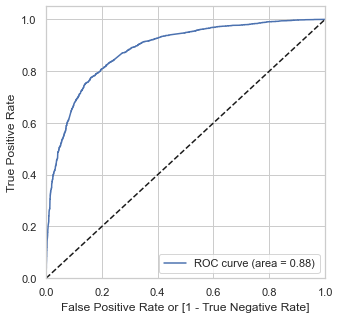

Area Under Curve:  0.8836537572671246


In [124]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

print('Area Under Curve: ', metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob))

### 8.4 Finding Optimal Cutoff Point

In [125]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Lead ID  Converted  Conversion_Prob  predicted  0.0  0.1  0.2  0.3  0.4  \
0      740          0         0.062696          0    1    0    0    0    0   
1      367          0         0.109030          0    1    1    0    0    0   
2     4792          0         0.273570          0    1    1    1    0    0   
3     7777          0         0.155803          0    1    1    0    0    0   
4     8135          0         0.540611          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    0    0    0    0

In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.411785  1.000000  0.000000
0.1   0.1  0.613469  0.973595  0.361360
0.2   0.2  0.746229  0.920358  0.624329
0.3   0.3  0.779025  0.875639  0.711389
0.4   0.4  0.806910  0.790886  0.818128
0.5   0.5  0.811645  0.725298  0.872093
0.6   0.6  0.801824  0.648211  0.909362
0.7   0.7  0.774640  0.533646  0.943351
0.8   0.8  0.747282  0.436968  0.964520
0.9   0.9  0.704665  0.302811  0.985987


In [127]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Optimal point 

From the curve above, ***0.38*** is the optimum point to take it as a cutoff probability.

In [128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

Lead ID  Converted  Conversion_Prob  predicted  0.0  0.1  0.2  0.3  0.4  \
0      740          0         0.062696          0    1    0    0    0    0   
1      367          0         0.109030          0    1    1    0    0    0   
2     4792          0         0.273570          0    1    1    1    0    0   
3     7777          0         0.155803          0    1    1    0    0    0   
4     8135          0         0.540611          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    1    0    0    0    0                1

In [129]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score


# Finding Accuracy, Recall, Precision, f1_score on Train data with 0.38 optimal cutoff

print("Accuracy, Sensitivity, Specificity, FPR, Recall, Precision, F1_score on TRAIN data model with 0.38 optimal cutoff : \n")

print("Accuracy: ", round(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) * 100,2), '%')

print("Recall: ", round(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) * 100,2), '%')
print("Precision: ", round(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) * 100,2), '%')
print("F1-Score: ", round(f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) * 100,2), '%')


# Creating confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
TP = confusion1[1,1]  # True positive 
TN = confusion1[0,0]  # True negatives
FP = confusion1[0,1]  # False positives
FN = confusion1[1,0]  # False negatives

print("Sensitivity: ", round(TP / (TP+FN) * 100,2), '%')
print("Specificity: ", round(TN / (TN+FP) * 100,2), '%')
print("False Positive Rate: ", round(FP/ (TN+FP)* 100,2), '%')
print("Positive predictive value: ", round(TP / (TP+FP)* 100,2), '%')
print("Negative predictive value: ", round(TN / (TN+FN)* 100,2), '%')

Accuracy, Sensitivity, Specificity, FPR, Recall, Precision, F1_score on TRAIN data model with 0.38 optimal cutoff : 

Accuracy:  80.43 %
Recall:  80.71 %
Precision:  74.08 %
F1-Score:  77.25 %
Sensitivity:  80.71 %
Specificity:  80.23 %
False Positive Rate:  19.77 %
Positive predictive value:  74.08 %
Negative predictive value:  85.59 %


### 8.5 Precision and recall tradeoff

In [130]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

In [131]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

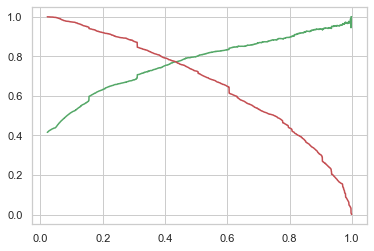

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

*** Optimal Point in Precision-Recall Tradeoff is 0.42 ***

In [133]:
#y_train_pred_final.drop(['final_predicted'], axis = 1, inplace = True)

In [134]:
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

Lead ID  Converted  Conversion_Prob  predicted  0.0  0.1  0.2  0.3  0.4  \
0      740          0         0.062696          0    1    0    0    0    0   
1      367          0         0.109030          0    1    1    0    0    0   
2     4792          0         0.273570          0    1    1    1    0    0   
3     7777          0         0.155803          0    1    1    0    0    0   
4     8135          0         0.540611          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  final_predicted_pr  
0    0    0    0    0    0                0                   0  
1    0    0    0    0    0                0                   0  
2    0    0    0    0    0                0                   0  
3    0    0    0    0    0                0                   0  
4    1    0    0    0    0                1                   1

In [135]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score


# Finding Accuracy, Recall, Precision, f1_score on Train data with 0.42 precision-recall optimal cutoff

print("Accuracy, Sensitivity, Specificity, FPR, Recall, Precision, F1_score on TRAIN data model with 0.42 optimal PRECISION-RECALL cutoff : \n")

print("Accuracy: ", round(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_pr)* 100,2), '%')

print("Recall: ", round(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_pr)* 100,2), '%')
print("Precision: ", round(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_pr)* 100,2), '%')
print("F1-Score: ", round(f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_pr)* 100,2), '%')


# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_pr)
TP = confusion2[1,1]  # True positive 
TN = confusion2[0,0]  # True negatives
FP = confusion2[0,1]  # False positives
FN = confusion2[1,0]  # False negatives

print("Sensitivity: ", round(TP / (TP+FN)* 100,2), '%')
print("Specificity: ", round(TN / (TN+FP)* 100,2), '%')
print("False Positive Rate: ", round(FP/ (TN+FP)* 100,2), '%')
print("Positive predictive value: ", round(TP / (TP+FP)* 100,2), '%')
print("Negative predictive value: ", round(TN / (TN+FN)* 100,2), '%')

Accuracy, Sensitivity, Specificity, FPR, Recall, Precision, F1_score on TRAIN data model with 0.42 optimal PRECISION-RECALL cutoff : 

Accuracy:  81.09 %
Recall:  77.94 %
Precision:  76.57 %
F1-Score:  77.25 %
Sensitivity:  77.94 %
Specificity:  83.3 %
False Positive Rate:  16.7 %
Positive predictive value:  76.57 %
Negative predictive value:  84.36 %


# 9. Making predictions on the test set

### 9.1  Scaling

In [136]:
X_test.head()

Do_Not_Email  TotalVisits  Total_Time_Spent_on_Website  \
5623             0            5                         1132   
8665             0            7                          859   
4379             0            7                         1029   
2480             0            3                         1283   
4815             0            5                          519   

      Page_Views_Per_Visit  A_free_copy_of_Mastering_The_Interview  \
5623                  5.00                                       1   
8665                  1.75                                       0   
4379                  7.00                                       0   
2480                  3.00                                       0   
4815                  5.00                                       0   

      Lead_Origin_landing page submission  Lead_Origin_lead add form  \
5623                                    1                          0   
8665                                    0                          0   
4379                                    1                          0   
2480                                    0                          0   
4815                                    1                          0   

      Lead_Origin_lead import  Lead_Source_facebook  Lead_Source_google  \
5623                        0                     0                   0   
8665                        0                     0                   1   
4379                        0                     0                   0   
2480                        0                     0                   1   
4815                        0                     0                   0   

      Lead_Source_organic search  Lead_Source_other_platforms  \
5623                           1                            0   
8665                           0                            0   
4379                           0                            0   
2480                           0                            0   
4815                           1                            0   

      Lead_Source_reference  Last_Activity_email bounced  \
5623                      0                            0   
8665                      0                            0   
4379                      0                            0   
2480                      0                            0   
4815                      0                            0   

      Last_Activity_email link clicked  Last_Activity_email opened  \
5623                                 0                           0   
8665                                 0                           0   
4379                                 0                           1   
2480                                 0                           0   
4815                                 0                           0   

      Last_Activity_form submitted on website  \
5623                                        0   
8665                                        0   
4379                                        0   
2480                                        0   
4815                                        0   

      Last_Activity_olark chat conversation  Last_Activity_others  \
5623                                      0                     0   
8665                                      0                     0   
4379                                      0                     0   
2480                                      0                     0   
4815                                      0                     0   

      Last_Activity_page visited on website  Last_Activity_sms sent  \
5623                                      0                       1   
8665                                      0                       1   
4379                                      0                       0   
2480                                      0                       1   
4815                                      0                       1   

      

In [137]:
nume_cols = X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[nume_cols] = scaler.transform(X_test[nume_cols])
X_test.head()    

Do_Not_Email  TotalVisits  Total_Time_Spent_on_Website  \
5623     -0.294124     0.542120                     1.156361   
8665     -0.294124     1.248188                     0.642401   
4379     -0.294124     1.248188                     0.962449   
2480     -0.294124    -0.163949                     1.440638   
4815     -0.294124     0.542120                     0.002306   

      Page_Views_Per_Visit  A_free_copy_of_Mastering_The_Interview  \
5623              1.349886                                1.409021   
8665             -0.414451                               -0.709713   
4379              2.435631                               -0.709713   
2480              0.264140                               -0.709713   
4815              1.349886                               -0.709713   

      Lead_Origin_landing page submission  Lead_Origin_lead add form  \
5623                                    1                          0   
8665                                    0                          0   
4379                                    1                          0   
2480                                    0                          0   
4815                                    1                          0   

      Lead_Origin_lead import  Lead_Source_facebook  Lead_Source_google  \
5623                        0                     0                   0   
8665                        0                     0                   1   
4379                        0                     0                   0   
2480                        0                     0                   1   
4815                        0                     0                   0   

      Lead_Source_organic search  Lead_Source_other_platforms  \
5623                           1                            0   
8665                           0                            0   
4379                           0                            0   
2480                           0                            0   
4815                           1                            0   

      Lead_Source_reference  Last_Activity_email bounced  \
5623                      0                            0   
8665                      0                            0   
4379                      0                            0   
2480                      0                            0   
4815                      0                            0   

      Last_Activity_email link clicked  Last_Activity_email opened  \
5623                                 0                           0   
8665                                 0                           0   
4379                                 0                           1   
2480                                 0                           0   
4815                                 0                           0   

      Last_Activity_form submitted on website  \
5623                                        0   
8665                                        0   
4379                                        0   
2480                                        0   
4815                                        0   

      Last_Activity_olark chat conversation  Last_Activity_others  \
5623                                      0                     0   
8665                                      0                     0   
4379                                      0                     0   
2480                                      0                     0   
4815                                      0                     0   

      Last_Activity_page visited on website  Last_Activity_sms sent  \
5623                                      0                       1   
8665                                      0                       1   
4379                                      0                       0   
2480                                      0                       1   
4815                                      0                       1   

      

### 9.2 Creating test dataframe using the same columns as model4.

In [138]:
col = X_train_model4.columns

# Select the columns in X_train for X_test as well
X_test_sm = X_test[col]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test_sm)

#Making Predicition on test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

5623    0.824783
8665    0.740015
4379    0.526175
2480    0.250618
4815    0.561907
2501    0.489829
2790    0.347409
2183    0.036562
8990    0.897574
9163    0.304395
dtype: float64

In [139]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_df.head()

0
5623  0.824783
8665  0.740015
4379  0.526175
2480  0.250618
4815  0.561907

In [140]:
y_test.head()

5623    1
8665    0
4379    1
2480    1
4815    1
Name: Converted, dtype: int64

In [141]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# let's see the head
y_test_df.head()

Converted
5623          1
8665          0
4379          1
2480          1
4815          1

In [142]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

Converted  Lead ID         0
0          1     5623  0.824783
1          0     8665  0.740015
2          1     4379  0.526175
3          1     2480  0.250618
4          1     4815  0.561907

In [143]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Lead ID  Conversion_Prob
0          1     5623         0.824783
1          0     8665         0.740015
2          1     4379         0.526175
3          1     2480         0.250618
4          1     4815         0.561907

### 9.3 Making predictions on the TEST dataset using 0.38 as the cutoff


In [144]:
#y_pred_final.drop(['final_predicted'], axis = 1, inplace = True)

In [145]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

Converted  Lead ID  Conversion_Prob  final_predicted
0          1     5623         0.824783                1
1          0     8665         0.740015                1
2          1     4379         0.526175                1
3          1     2480         0.250618                0
4          1     4815         0.561907                1

### 9.4. Final metrics on test data

In [146]:
# Finding Accuracy, Recall, Precision, f1_score on Test data for final model with 0.38 cutoff

print("Accuracy, Sensitivity, Specificity, FPR, Recall, Precision, F1_score on TEST data for final model with 0.38 cutoff : \n")

print("Accuracy: ", round(accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)* 100,2), '%')

print("Recall: ", round(recall_score(y_pred_final.Converted, y_pred_final.final_predicted)* 100,2), '%')
print("Precision: ", round(precision_score(y_pred_final.Converted, y_pred_final.final_predicted)* 100,2), '%')
print("F1-Score: ", round(f1_score(y_pred_final.Converted, y_pred_final.final_predicted)* 100,2), '%')

# Confusion Matrix
confusion4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
TP = confusion4[1,1]  # True positive 
TN = confusion4[0,0]  # True negatives
FP = confusion4[0,1]  # False positives
FN = confusion4[1,0]  # False negatives

print("Sensitivity: ", round(TP / float(TP+FN)* 100,2), '%')
print("Specificity: ", round(TN / float(TN+FP)* 100,2), '%')
print("False Positive Rate: ", round(FP/ float(TN+FP)* 100,2), '%')
print("Positive predictive value: ", round(TP / (TP+FP)* 100,2), '%')
print("Negative predictive value: ", round(TN / (TN+FN)* 100,2), '%')


Accuracy, Sensitivity, Specificity, FPR, Recall, Precision, F1_score on TEST data for final model with 0.38 cutoff : 

Accuracy:  79.46 %
Recall:  79.92 %
Precision:  72.83 %
F1-Score:  76.21 %
Sensitivity:  79.92 %
Specificity:  79.14 %
False Positive Rate:  20.86 %
Positive predictive value:  72.83 %
Negative predictive value:  84.93 %


# 10. Lead Score

In [147]:
# Assigning a Lead Score between 0 and 100 to each of the leads which can be used by the company to target potential hot leads. 

y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_pred_final.head()

Converted  Lead ID  Conversion_Prob  final_predicted  Lead_Score
0          1     5623         0.824783                1          82
1          0     8665         0.740015                1          74
2          1     4379         0.526175                1          53
3          1     2480         0.250618                0          25
4          1     4815         0.561907                1          56

# 11. Summary and Conclusions

### 11.1 Variables affecting the conversions

In [148]:
pd.Series.sort_values(result.params, ascending = False)

Lead_Origin_lead add form                               3.434175
What_is_your_current_occupation_working professional    3.270989
Last_Notable_Activity_sms sent                          2.118897
Lead_Source_other_platforms                             1.205020
Total_Time_Spent_on_Website                             1.126629
What_is_your_current_occupation_unemployed              0.921786
What_is_your_current_occupation_student                 0.911816
Last_Activity_email opened                              0.893064
Last_Notable_Activity_others                            0.723179
Last_Notable_Activity_page visited on website           0.584773
Specialization_not provided                            -0.821544
Lead_Origin_landing page submission                    -0.897538
const                                                  -1.896838
dtype: float64

### 11.2 The metrics %s --------------------


***Accuracy, Sensitivity, Specificity, FPR, Recall, Precision, F1_score on TRAIN data model with 0.38 optimal cutoff :***

- Accuracy           :  80.43 %

- Recall             :  80.71 %

- Precision          :  74.11 %

- F1-Score           :  77.25 %

- Sensitivity        :  80.71 % 

- Specificity        :  80.23 %

- False Positive Rate:  19.77 %



***Accuracy, Sensitivity, Specificity, FPR, Recall, Precision, F1_score on TEST data for final model with 0.38 cutoff :*** 

- Accuracy           :  79.46 %

- Recall             :  79.92 %

- Precision          :  72.83 %

- F1-Score           :  76.20 %

- Sensitivity        :  79.92 %

- Specificity        :  79.14 %

- False Positive Rate:  20.86 %

### 11.3 Top Variables 

### The top 3 features which are contributing significantly towards the probability of a lead getting converted are the following :


1. ***Lead Origin_lead add form:*** 
Lead Origin and Lead Source combinedly play an important role in increasing the probability of lead conversion.



2. ***What_is_your_current_occupation_working professional :*** 
It can be seen that 'Working Professionals' have the highest chances to convert to a customer.



3. ***Last Notable Activity_sms sent :*** The last notable activity where the candidate has sent an SMS seems to play an important role.



### 11.4 Conclusion
Since the model metrics of Train and Test data sets seems to be nearly same, the model seesm to be good enough. As per the model predictions, the above mentioned features impacts the lead conversion probability the most. The company should focus of these features to increased their conversion rate. 